In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import math
import os

from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

In [2]:
# df_china = pd.read_csv('output/merged_china.csv')
# df_us = pd.read_csv('output/merged_us.csv')
# df_india = pd.read_csv('output/merged_india.csv')

# df_raw_owid = pd.read_csv('dataset/owid/owid-co2-data.csv')
# df_raw_ghg = pd.read_csv('dataset/owid/ghg-emissions-by-sector.csv')
df_raw_worldbank = pd.read_csv('dataset/worldbank/API.csv')
# df_worldbank_meta_country = pd.read_csv('dataset/worldbank/Metadata_Country_API_19_DS2_en_csv_v2_3159902.csv')
df_raw_worldbank_transposed = pd.read_csv('output/dataset_worldbank_transposed.csv')

df_worldbank_imputed = pd.read_csv('output/dataset_worldbank_imputed.csv')

## README (Last Update: 31 / Jan / 2022)

This is the overall content of this notebook.

### EDA

EDA for imputed dataset (min, max, mean, etc...), nothing fancy here.

### Clustering Preprocessing

The preprocessing steps start with some basics filtering
1. filter country name
2. filter years range

The dataset imported (`df_worldbank_imputed`) are cleaned and imputed already. This preprocessing stage are to
1. Performa data normalization
2. Pivot dataset into another **year-column** format (columns of years)
3. Lastly, prepare X_train dataset (tslearn needs to use `to_time_series_dataset` to preprocess data)


### Time Series K Means

There are 3 ways of K means clustering, listed below
- Euclidean K Means
- DBA K Means
- Soft DTW K Means

Each of this clustering method is being made into a function. The function will plot a graph for clustering result and return y_pred clustering results. 

### EDA for Clustering Results

Lastly, after obtaining clustering results, this part serves the purpose of listing country name in clustering result or plot more detailed graph.

## Basic EDA
For imputed dataset, nothing fancy

In [3]:
df_worldbank_imputed

,Country Name,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
0,Aruba,1980,174.694594,10498.621000,50.472,0.208214,424.783771,114.675152,12.675500,9.887823,67210.520276
1,Aruba,1981,165.121266,9999.909000,50.456,0.769120,519.001013,191.589042,12.937000,9.381611,63546.834639
2,Aruba,1982,182.270961,11180.683000,50.441,1.279734,564.023574,204.145519,13.182000,10.050591,70173.108044
3,Aruba,1983,92.363156,5746.189000,50.426,1.411552,530.385687,239.228605,13.362200,6.096364,35566.572603
4,Aruba,1984,228.392242,14348.971000,50.411,0.980502,571.038292,246.726780,13.648800,12.098059,87957.121197
...,...,...,...,...,...,...,...,...,...,...,...
10450,Zimbabwe,2016,0.783303,10990.000000,32.296,1.549294,29120.000000,1587.372070,11380.000000,1.758855,638.573763
10451,Zimbabwe,2017,0.718570,10230.000000,32.237,1.459406,28800.000000,1266.889816,11560.000000,1.763322,626.070625
10452,Zimbabwe,2018,0.849793,12270.000000,32.209,1.410382,31380.000000,1394.553693,11850.000000,1.770196,689.716153
10453,Zimbabwe,2019,1.044350,22202.653263,32.210,1.421142,83902.692361,23047.297738,25674.773597,1.750212,785.180953


In [4]:
df_worldbank_imputed.describe()

,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
count,10455.000000,10455.000000,1.045500e+04,10455.000000,10455.000000,1.045500e+04,1.045500e+04,1.045500e+04,10455.000000,10455.000000
mean,2000.000000,4.324454,8.473830e+05,53.516498,1.602138,1.270182e+06,3.816025e+04,2.726300e+05,2.150809,1923.000694
std,11.832725,6.774820,2.917141e+06,23.428964,1.405863,4.072949e+06,3.734250e+05,8.405047e+05,1.792490,2782.681293
min,1980.000000,0.000000,0.000000e+00,4.339000,-6.766133,0.000000e+00,-1.064283e+06,0.000000e+00,0.000000,0.000000
25%,1990.000000,0.749236,2.240000e+03,33.786500,0.616634,1.233000e+04,-1.610261e+03,3.380000e+03,1.685609,499.574172
50%,2000.000000,2.627933,2.432727e+04,52.824000,1.530234,6.743000e+04,3.585986e+01,1.666920e+04,2.147830,1119.204631
75%,2010.000000,5.985056,1.575450e+05,72.615888,2.540373,2.812050e+05,7.862724e+03,6.444500e+04,2.558416,2615.266287
max,2020.000000,266.483562,3.404105e+07,100.000000,17.512207,4.587385e+07,6.097786e+06,8.174420e+06,103.157895,102629.151305


In [5]:
df_raw_worldbank

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.100461,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102050.000000,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.377979,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.856921,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,42.393693,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN,NaN


In [6]:
df_raw_worldbank_transposed

,Country Name,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
0,Aruba,1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
2,Aruba,1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
3,Aruba,1963,50.730,28763.0,0.788835,56699.0,0.823502,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
4,Aruba,1964,50.715,28922.0,0.551271,57029.0,0.580334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16221,Zimbabwe,2016,32.296,4531238.0,1.274094,14030338.0,1.549294,NaN,NaN,NaN,...,45.570273,176288.6,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
16222,Zimbabwe,2017,32.237,4589452.0,1.276544,14236599.0,1.459406,33.9,NaN,NaN,...,45.451183,175827.9,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
16223,Zimbabwe,2018,32.209,4650597.0,1.323497,14438812.0,1.410382,NaN,NaN,NaN,...,45.332093,175367.2,NaN,NaN,NaN,NaN,NaN,10.339925,41.876696,162000.0
16224,Zimbabwe,2019,32.210,4717307.0,1.424249,14645473.0,1.421142,39.5,9.7,NaN,...,45.213002,174906.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
feat_list = df_worldbank_imputed.columns.tolist()

# del 'Country Name'
del feat_list[0]
# del 'Year'
del feat_list[0]

feat_list

['CO2 emissions (metric tons per capita)',
 'CO2 emissions (kt)',
 'Urban population (% of total population)',
 'Population growth (annual %)',
 'Total greenhouse gas emissions (kt of CO2 equivalent)',
 'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
 'Methane emissions (kt of CO2 equivalent)',
 'CO2 intensity (kg per kg of oil equivalent energy use)',
 'Energy use (kg of oil equivalent per capita)']

In [8]:
years_range = df_worldbank_imputed['Year'].unique().tolist()
print("Number of Years: " + str(len(years_range)))
print(years_range)

Number of Years: 41
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [9]:
country_list = df_worldbank_imputed['Country Name'].unique().tolist()
country_list

['Aruba',
 'Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic di

## Clustering Preprocessing

Missing value is being handled by imputation. This preprocessing is to pivot (or transpose) data in column-year format (columns of years), in order to fit into tslearn's kmeans clustering.

In [10]:
#
# The 'Country Name' column also contain continent, income & members categories
# Since their appearance greatllaffects clustering, hence we separate the data
#
# below provide a few options of filtering
#

non_country_list = [ 
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)'
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Small states',
    'South Africa',
    'South Asia',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'World',
    'Upper middle income',
    'Post-demographic dividend',
    'Early-demographic dividend',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Low & middle income',
    'Central Europe and the Baltics',
    'Sub-Saharan Africa',
    'Fragile and conflict affected situations',
    'North America',
    'Central African Republic'
]

df_worldbank_imputed_non_country = df_worldbank_imputed[df_worldbank_imputed['Country Name'].isin(non_country_list)==True].copy()
df_worldbank_imputed_country = df_worldbank_imputed[df_worldbank_imputed['Country Name'].isin(non_country_list)==False].copy()

In [11]:
# filter country

# choose between country or non_country dataset

# option 1 (default option)
df_worldbank_imputed = df_worldbank_imputed_country

# option 2
# df_worldbank_imputed = df_worldbank_imputed_non_country

In [43]:
# filter year

# remove year 2019, 2020
years_range_filtered = years_range[:-2]

df_worldbank_imputed = df_worldbank_imputed[df_worldbank_imputed['Year'].isin(years_range_filtered)==True].copy()

# year 2020 removed
print(df_worldbank_imputed['Year'].unique().tolist())

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [44]:
#
# Normalization
#

# seperate indicator columns and country year columns
df_worldbank_normalized = df_worldbank_imputed.iloc[:, 2:]
df_country_and_year = df_worldbank_imputed.iloc[:, :2]
  
# apply normalization techniques
for column in df_worldbank_normalized.columns:
    # max scaled normalization
    minValue = df_worldbank_normalized.min()
    maxValue = df_worldbank_normalized.max()
    df_worldbank_normalized=(df_worldbank_normalized-minValue)/(maxValue-minValue)
      
# merge back country year with normalized data
df_worldbank_normalized = pd.concat([df_worldbank_normalized, df_country_and_year], axis=1)

# rearrange columns order
col = df_worldbank_normalized.columns.tolist()
new_col = col[-2:] + col[:-2]
df_worldbank_normalized = df_worldbank_normalized[new_col]
df_worldbank_normalized

,Country Name,Year,CO2 emissions (metric tons per capita),CO2 emissions (kt),Urban population (% of total population),Population growth (annual %),Total greenhouse gas emissions (kt of CO2 equivalent),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),CO2 intensity (kg per kg of oil equivalent energy use),Energy use (kg of oil equivalent per capita)
0,Aruba,1980,0.655555,0.001018,0.482255,0.287266,0.000034,0.140100,0.000010,0.095851,0.654887
1,Aruba,1981,0.619630,0.000970,0.482088,0.310369,0.000042,0.140126,0.000010,0.090944,0.619189
2,Aruba,1982,0.683986,0.001084,0.481931,0.331401,0.000046,0.140131,0.000011,0.097429,0.683754
3,Aruba,1983,0.346600,0.000557,0.481774,0.336830,0.000043,0.140142,0.000011,0.059097,0.346554
4,Aruba,1984,0.857059,0.001391,0.481617,0.319076,0.000046,0.140145,0.000011,0.117277,0.857038
...,...,...,...,...,...,...,...,...,...,...,...
10448,Zimbabwe,2014,0.003356,0.001178,0.294425,0.350966,0.002376,0.140714,0.008711,0.016933,0.006407
10449,Zimbabwe,2015,0.003368,0.001202,0.293181,0.347216,0.002532,0.140905,0.009492,0.017000,0.006536
10450,Zimbabwe,2016,0.002939,0.001066,0.292251,0.342504,0.002357,0.140597,0.009162,0.017050,0.006222
10451,Zimbabwe,2017,0.002696,0.000992,0.291634,0.338802,0.002331,0.140489,0.009306,0.017093,0.006100


In [45]:
#
# pivot function 1
#

# function to slice out country from the df
# and transpose the data to become column-year format
# must have columns = ['Country Name', 'Year', ... indicators ...]
def get_pivot_data_column_year(df, country_name):
    
    # slice out targeted country and store it inside df_country
    df_country = df[df['Country Name'] == f'{country_name}'].copy()
    df_country.reset_index(inplace=True, drop=True) 

    # get ready to transpose
    df_country = df_country.iloc[:, 1:] # remove 'Country Name'
    df_country.Year = df_country.Year.astype('str') # convert 'year' to string type
    
    # transpose
    df_country = df_country.transpose()
    df_country.reset_index(inplace=True) 

    # reset first row as column
    new_header = df_country.iloc[0] # grab the first row for the header
    df_country = df_country[1:] # take the data but not header
    df_country.columns = new_header # set the header row as the df header
    df_country.rename(columns={'Year': 'Indicator Name'}, inplace=True) # rename the column column
    df_country.reset_index(inplace=True, drop=True) 

    # adding new columns
    df_country['Country Name'] = f'{country_name}'

    # rearrange columns
    col = df_country.columns.tolist()
    new_col = col[-1:] + col[:-1]
    
    return df_country[new_col]

In [46]:
#
# pivot function 2
#

# function to slice out country from the df
# and transpose the data to become year-column format
def get_pivot_data_year_column(df, country_name, columnsToDrop=[]):
    df_country = df[df['Country Name'] == country_name].copy()
    if len(df_country) == 0:
        return 0 # country name does not exist
    
    # get ready to transpose
    df_country.drop(columns=columnsToDrop, inplace=True)
    df_country.reset_index(inplace=True, drop=True) 
    
    # transpose
    df_country = df_country.transpose()
#     df_country.reset_index(inplace=True)
    
    # reset header
    new_header = df_country.iloc[0] # grab the first row for the header
    df_country = df_country[1:] # take the data but not header
    df_country.columns = new_header # set the header row as the df header
    df_country.rename(columns={'Indicator Name': 'Year'}, inplace=True)
    
    # reset column type to float
    headers = df_country.columns.tolist()[1:] # all headers except 'Year'
    for h in headers:
        df_country[h] = df_country[h].apply(pd.to_numeric, errors='coerce')
    
    # add country name column back and reposition it to first column
    df_country['Country Name'] = country_name
    cols = df_country.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_country = df_country[cols]
        
    return df_country

In [47]:
#
# pivot function 3
#

# function to slice out country from the df
# and transpose the data to become year-column format
# specially design for clustering function
def get_pivot_data_year_column_cluster(df, country_name, indicatorName, columnsToDrop=[]):
    df_country = df[df['Country Name'] == country_name].copy()
    if len(df_country) == 0:
        return 0 # country name does not exist
    
    # get ready to transpose
    df_country.drop(columns=columnsToDrop, inplace=True)
    df_country.reset_index(inplace=True, drop=True) 
    
    # transpose
    df_country = df_country.transpose()
    
    # rename header
    df_country.rename(columns={0: f'{indicatorName}'}, inplace=True)
    df_country.reset_index(inplace=True)
    df_country.rename(columns={0: 'Year'}, inplace=True)
    
    # reset year column type to int and others to float
    df_country['Year'] = df_country['Year'].astype('int32')
    headers = df_country.columns.tolist()[1:] # all headers except 'Year'
    for h in headers:
        df_country[h] = df_country[h].apply(pd.to_numeric, errors='coerce')
    
    # add country name column back and reposition it to first column
    df_country['Country Name'] = country_name
    cols = df_country.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_country = df_country[cols]
        
    return df_country

In [48]:
#
# Transpose and pivot dataset
#

# define countries, years and columns
countries = df_worldbank_normalized['Country Name'].unique().tolist()
years = df_worldbank_normalized['Year'].unique()
years = years.tolist()
years = [str(year) for year in years]
columns = ['Country Name', 'Indicator Name'] + years


# loop the entire dataset and transpose all countries
df_worldbank_transposed = pd.DataFrame([], columns=columns)
for country in countries:
    df_temp = get_pivot_data_column_year(df_worldbank_normalized, country) 
    df_worldbank_transposed = pd.concat([df_worldbank_transposed, df_temp], axis=0, ignore_index=True)
    
# final transposed result for clustering
df_worldbank_transposed

,Country Name,Indicator Name,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,CO2 emissions (metric tons per capita),0.655555,0.61963,0.683986,0.3466,0.857059,1,0.0107634,0.0271484,...,0.00807758,0.00786168,0.00772377,0.00761058,0.00748925,0.00735288,0.00720532,0.00706539,0.00693198,0.00680814
1,Aruba,CO2 emissions (kt),0.00101795,0.000969598,0.00108409,0.000557154,0.00139129,0.00162844,1.74222e-05,4.33777e-05,...,0.00223306,0.00223089,0.00223094,0.00223176,0.0022324,0.00223267,0.00223267,0.00223288,0.00223328,0.00223393
2,Aruba,Urban population (% of total population),0.482255,0.482088,0.481931,0.481774,0.481617,0.48145,0.481293,0.481137,...,0.408547,0.404763,0.403519,0.403696,0.404041,0.404574,0.405275,0.406153,0.407209,0.408442
3,Aruba,Population growth (annual %),0.287266,0.310369,0.331401,0.33683,0.319076,0.291651,0.253846,0.225285,...,0.282346,0.287329,0.294259,0.299424,0.302715,0.303013,0.300975,0.299402,0.298126,0.297607
4,Aruba,Total greenhouse gas emissions (kt of CO2 equi...,3.43809e-05,4.20066e-05,4.56506e-05,4.2928e-05,4.62183e-05,5.19737e-05,3.52772e-05,4.99326e-05,...,0.00667142,0.00667467,0.00667462,0.00667342,0.00667249,0.0066721,0.00667209,0.00667177,0.00667118,0.0066702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,Zimbabwe,Total greenhouse gas emissions (kt of CO2 equi...,0.00184182,0.00176714,0.00184027,0.00183029,0.00177949,0.00193406,0.00210495,0.00227922,...,0.00203719,0.00227272,0.00247264,0.00249125,0.00249773,0.00237551,0.00253172,0.00235689,0.00233099,0.00253981
1868,Zimbabwe,"Other greenhouse gas emissions, HFC, PFC and S...",0.140188,0.140205,0.140215,0.140227,0.140247,0.140255,0.140273,0.139156,...,0.139882,0.140267,0.140558,0.140678,0.140727,0.140714,0.140905,0.140597,0.140489,0.140532
1869,Zimbabwe,Methane emissions (kt of CO2 equivalent),0.00606543,0.00588754,0.00642344,0.00640428,0.00605604,0.00627715,0.00655814,0.00739817,...,0.0087268,0.00910518,0.00951576,0.0094433,0.00941915,0.0087107,0.00949161,0.00916153,0.00930644,0.00953991
1870,Zimbabwe,CO2 intensity (kg per kg of oil equivalent ene...,0.0143886,0.0138907,0.0128745,0.0149107,0.013901,0.0134354,0.0162511,0.0172782,...,0.00822243,0.0100536,0.0108648,0.0108596,0.0106165,0.0169334,0.0169997,0.0170501,0.0170934,0.0171601


In [49]:
#
# Prepare df_train
#

# since the clustering is not multivariate clustering
# so have to choose one variable for this clustering
# this part prepare univariate train data

def get_time_series_prepared_data(df_main, indicatorName, columnToDrop):
    df_train = df_main[df_main['Indicator Name']== indicatorName]
    if len(indicatorName) < 0:
        return 0
    df_train = df_train.drop(columns=columnToDrop)
    df_train.set_index('Country Name', inplace=True)

    # convert training set into another format for tslearn
    return to_time_series_dataset(df_train.copy())

In [50]:
columnToDrop = ['Indicator Name']

X_train_co2_emissions_per_capita = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'CO2 emissions (metric tons per capita)', 
    columnToDrop
)

X_train_co2_emissions = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'CO2 emissions (kt)', 
    columnToDrop
)

X_train_urban_population = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Urban population (% of total population)', 
    columnToDrop
)

X_train_population_growth = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Population growth (annual %)', 
    columnToDrop
)

X_train_total_ghg = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Total greenhouse gas emissions (kt of CO2 equivalent)', 
    columnToDrop
)

X_train_other_ghg = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)', 
    columnToDrop
)

X_train_methane_emissions = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Methane emissions (kt of CO2 equivalent)', 
    columnToDrop
)

X_train_co2_intensity = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'CO2 intensity (kg per kg of oil equivalent energy use)', 
    columnToDrop
)

X_train_energy_use = get_time_series_prepared_data(
    df_worldbank_transposed, 
    'Energy use (kg of oil equivalent per capita)', 
    columnToDrop
)

### Time Series K Means

In [51]:
# Matplotlib customization
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 150.
mpl.rcParams["figure.figsize"] = (20,50) #change figure size, (x, y)

In [52]:
seed = 1
np.random.seed(seed)

In [53]:
# Set number of cluster

cluster_number = 10

In [54]:
def euclideanKMeans(cluster, seed, X_train):
    print("Euclidean k-means")
    km = TimeSeriesKMeans(n_clusters=cluster, 
                          verbose=True, 
                          random_state=seed, 
                          max_iter=10)
    y_pred = km.fit_predict(X_train)
#     clusters = pd.Series(data=y_pred, index=X_train.index)
#     clusters

    plt.figure()
    for yi in range(cluster):
        plt.subplot(cluster, 1, yi+1)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")
        plt.ylim(0, 1)
        plt.text(0.01, 0.50,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)

    print("Euclidean k-means Chart")
    plt.show()
    return y_pred

In [55]:
# DBA-k-means
def dbaKMeans(cluster, seed, X_train):
    print("DBA k-means")
    dba_km = TimeSeriesKMeans(n_clusters=cluster,
                              n_init=2,
                              metric="dtw",
                              verbose=True,
                              max_iter_barycenter=10,
                              random_state=seed)
    y_pred = dba_km.fit_predict(X_train)

    for yi in range(cluster):
        plt.subplot(cluster, 1, yi+1)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
        plt.ylim(0, 1)
        plt.text(0.01, 0.50,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)


    print("DBA k-means Chart")
    plt.show()
    return y_pred

In [56]:
# Soft-DTW-k-means
def softDTWKmean(cluster, seed, X_train):
    print("Soft-DTW k-means")
    sdtw_km = TimeSeriesKMeans(n_clusters=cluster,
                               metric="softdtw",
                               metric_params={"gamma": .01},
                               verbose=True,
                               random_state=seed)
    y_pred = sdtw_km.fit_predict(X_train)

    for yi in range(cluster):
        plt.subplot(cluster, 1, yi+1)
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.ylim(0, 1)
        plt.text(0.01, 0.50,'Cluster %d' % (yi),
                 transform=plt.gca().transAxes)

    print("Soft-DTW k-means Chart")
    plt.show()
    return y_pred

In [57]:
def mergeClusterNames(y_pred, df_index, indexName):
    clusters = pd.Series(data=y_pred, index=df_index)
    df_cluster = clusters.to_frame()
    df_cluster.reset_index(drop=False, inplace=True)
    df_cluster.columns = [indexName, 'cluster']
    return df_cluster

# use this get cluster instead of directly filter it. 
# Because the graph displayed need to be -1 to get correct cluster name 
def getSingleCluster(df_cluster, n):
    # cluster 1 in the chart represent cluster 0 in the data.
    return df_cluster[df_cluster['cluster'] == n-1]

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 
Init 2


[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 


[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished


DBA k-means Chart


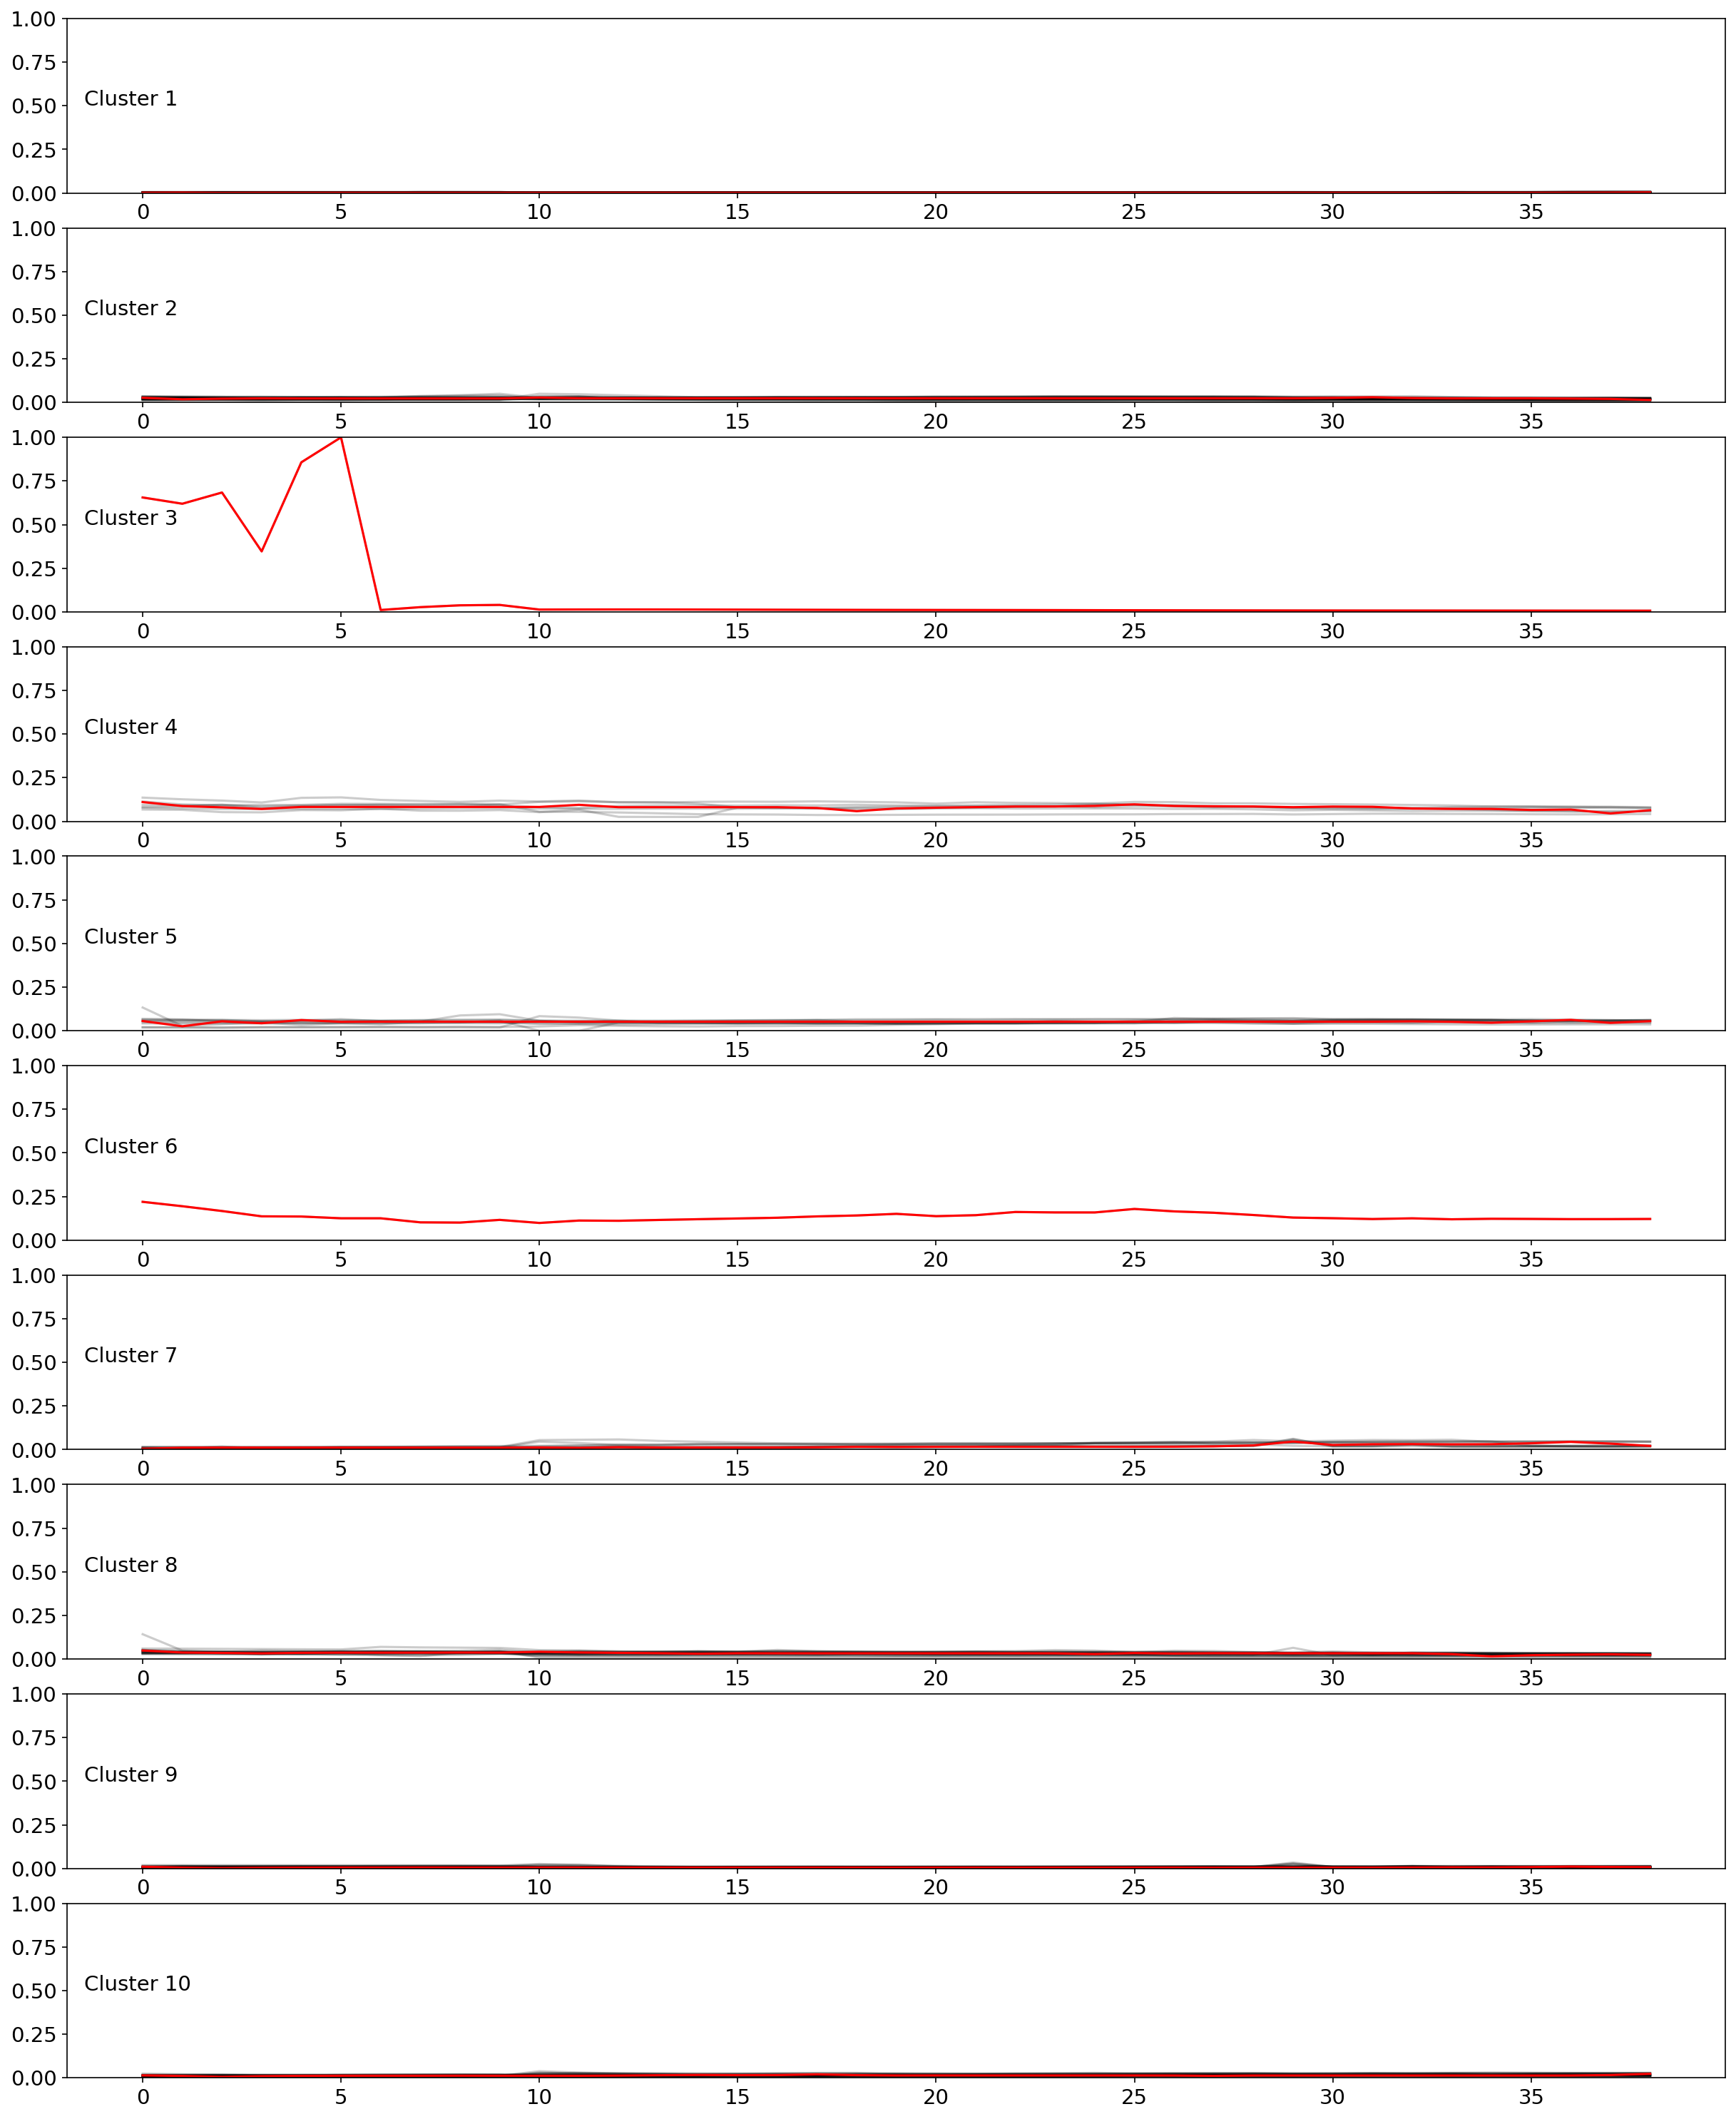

In [58]:
# co2 emissions per capita

mpl.rcParams["figure.figsize"] = (20,25) #change figure size, (x, y)
y_pred_X_co2_emissions_per_capita = dbaKMeans(10, seed, X_train_co2_emissions_per_capita)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 
Init 2


[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 


[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished


DBA k-means Chart


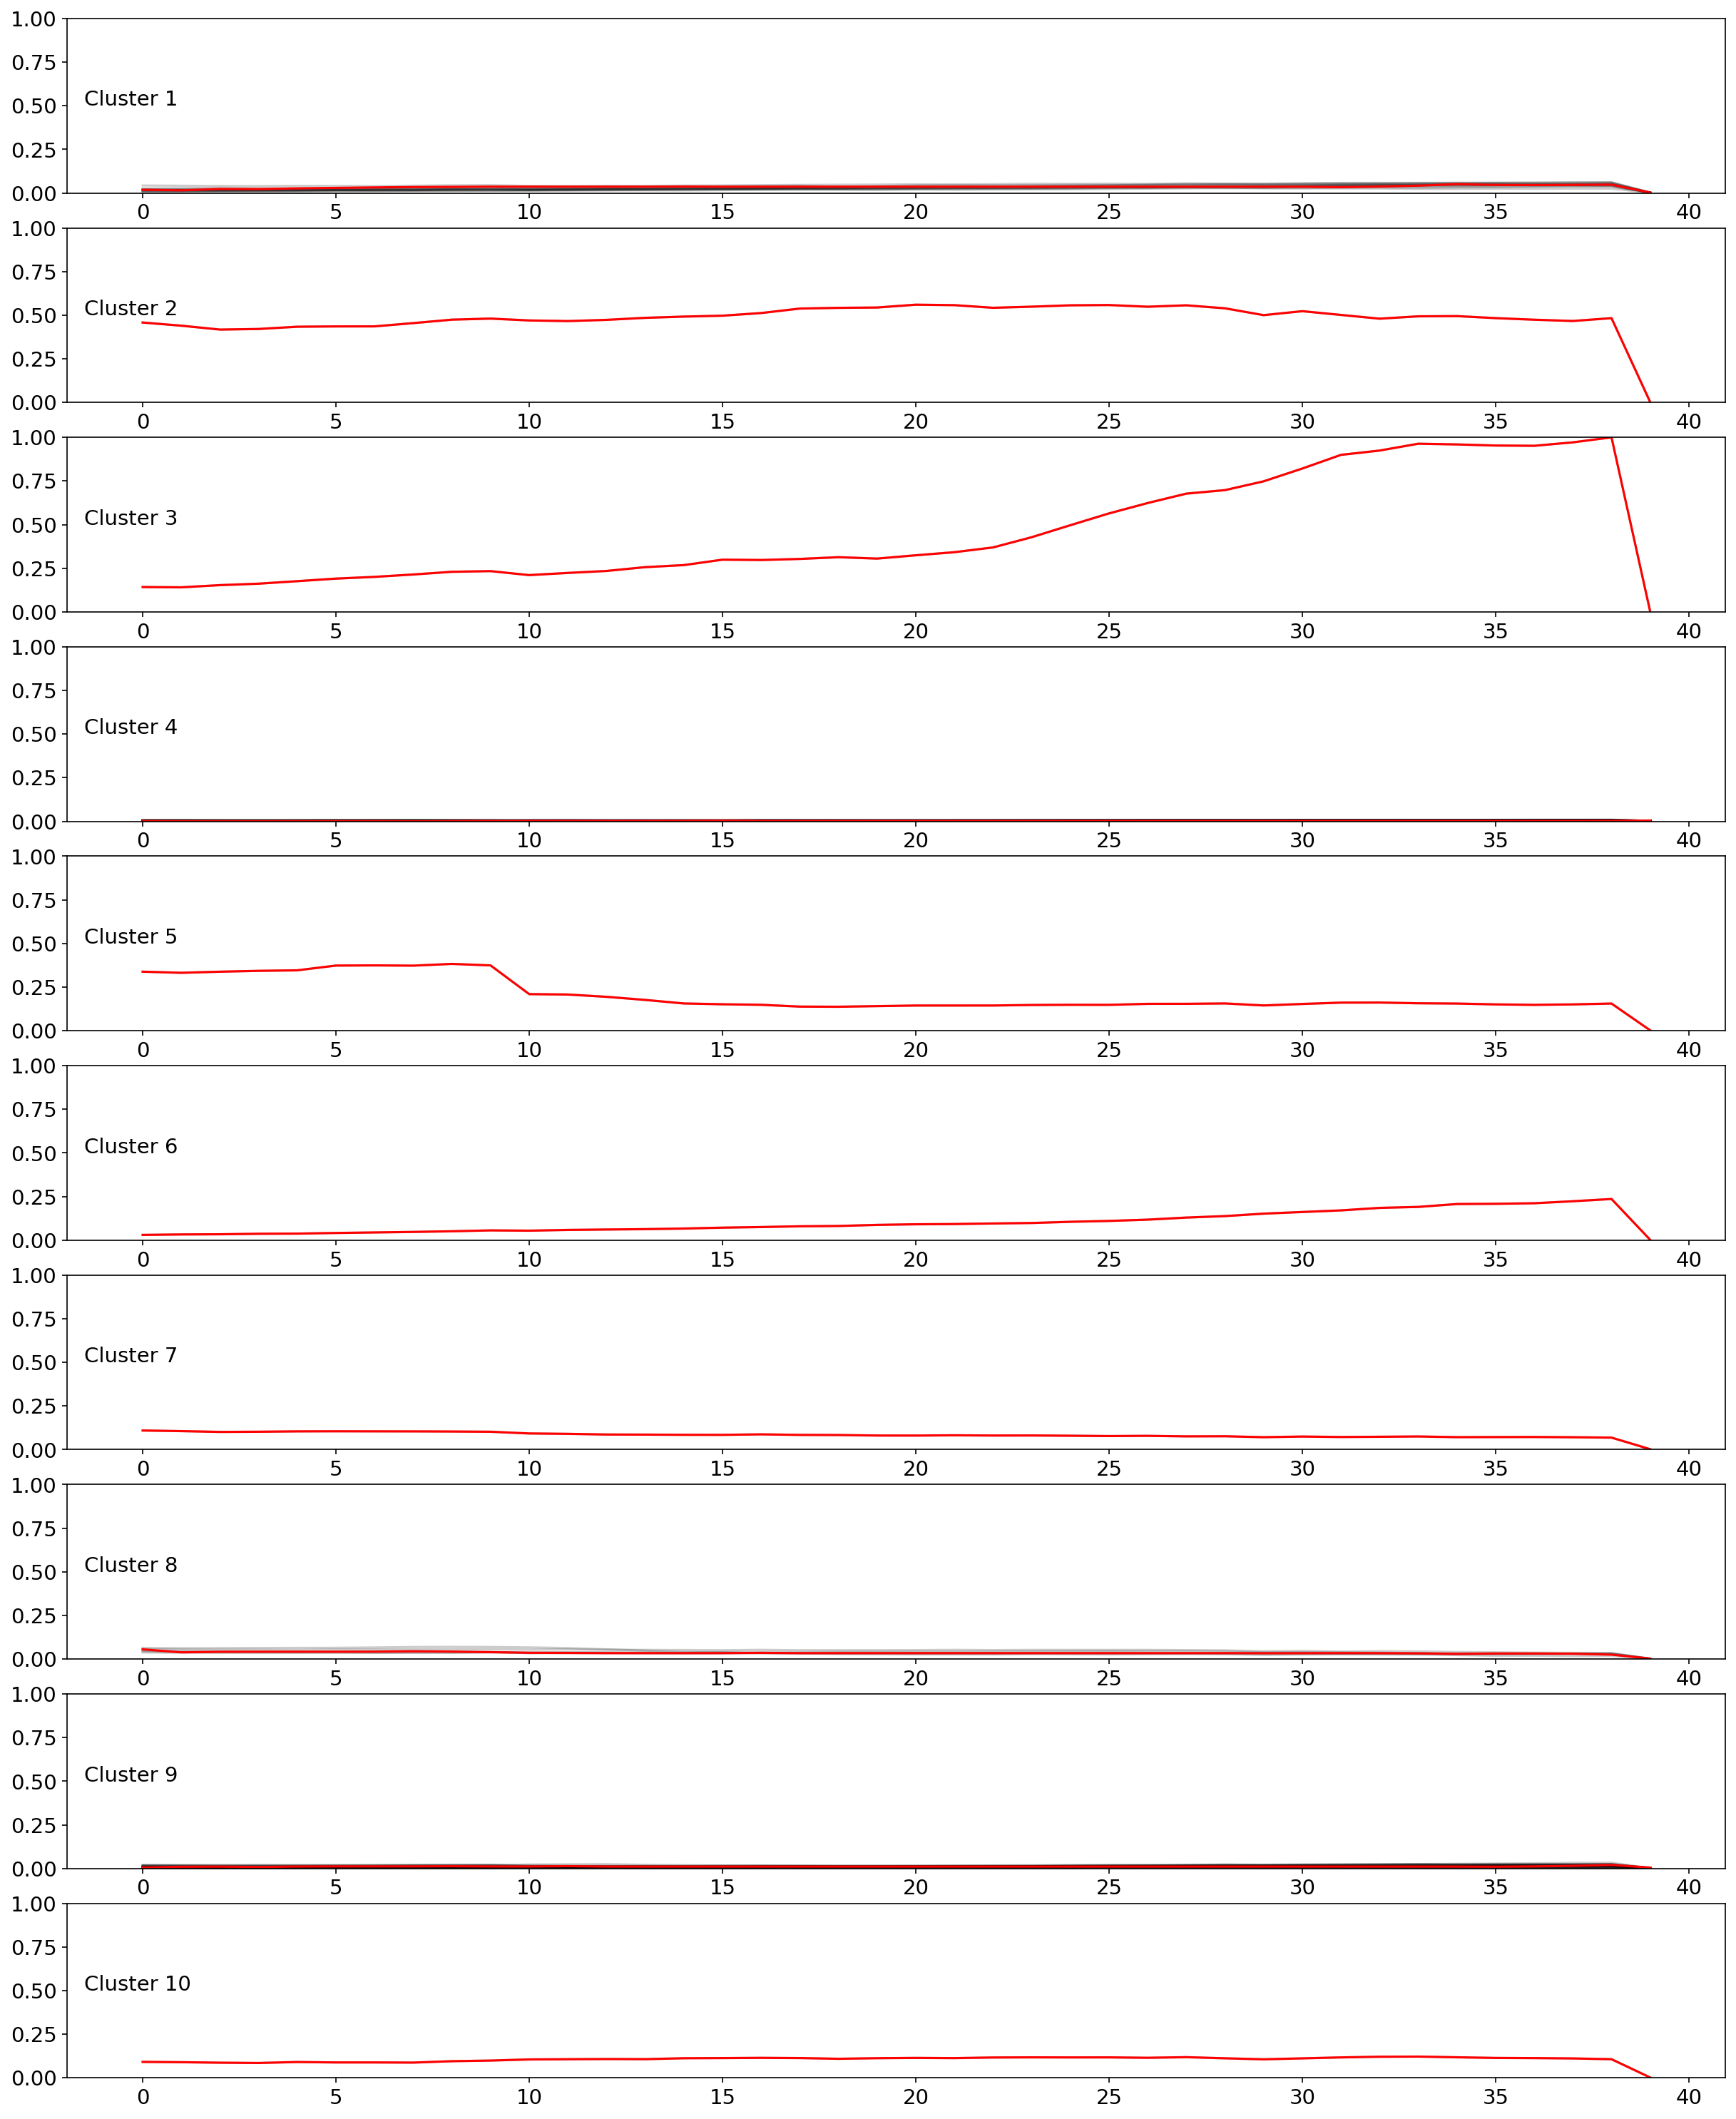

In [28]:
# co2 emissions

mpl.rcParams["figure.figsize"] = (20,25) #change figure size, (x, y)
y_pred_X_co2_emissions = dbaKMeans(10, seed, X_train_co2_emissions)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.085 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


0.043 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.041 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.041 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.040 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


0.040 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


0.038 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


0.037 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


0.037 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.036 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.036 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.036 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.036 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished


0.036 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.094 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


0.040 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.038 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.037 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.037 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.037 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.037 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.037 --> 

[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.037 --> 


[Parallel(n_jobs=1)]: Done 1664 out of 1664 | elapsed:    0.1s finished


DBA k-means Chart


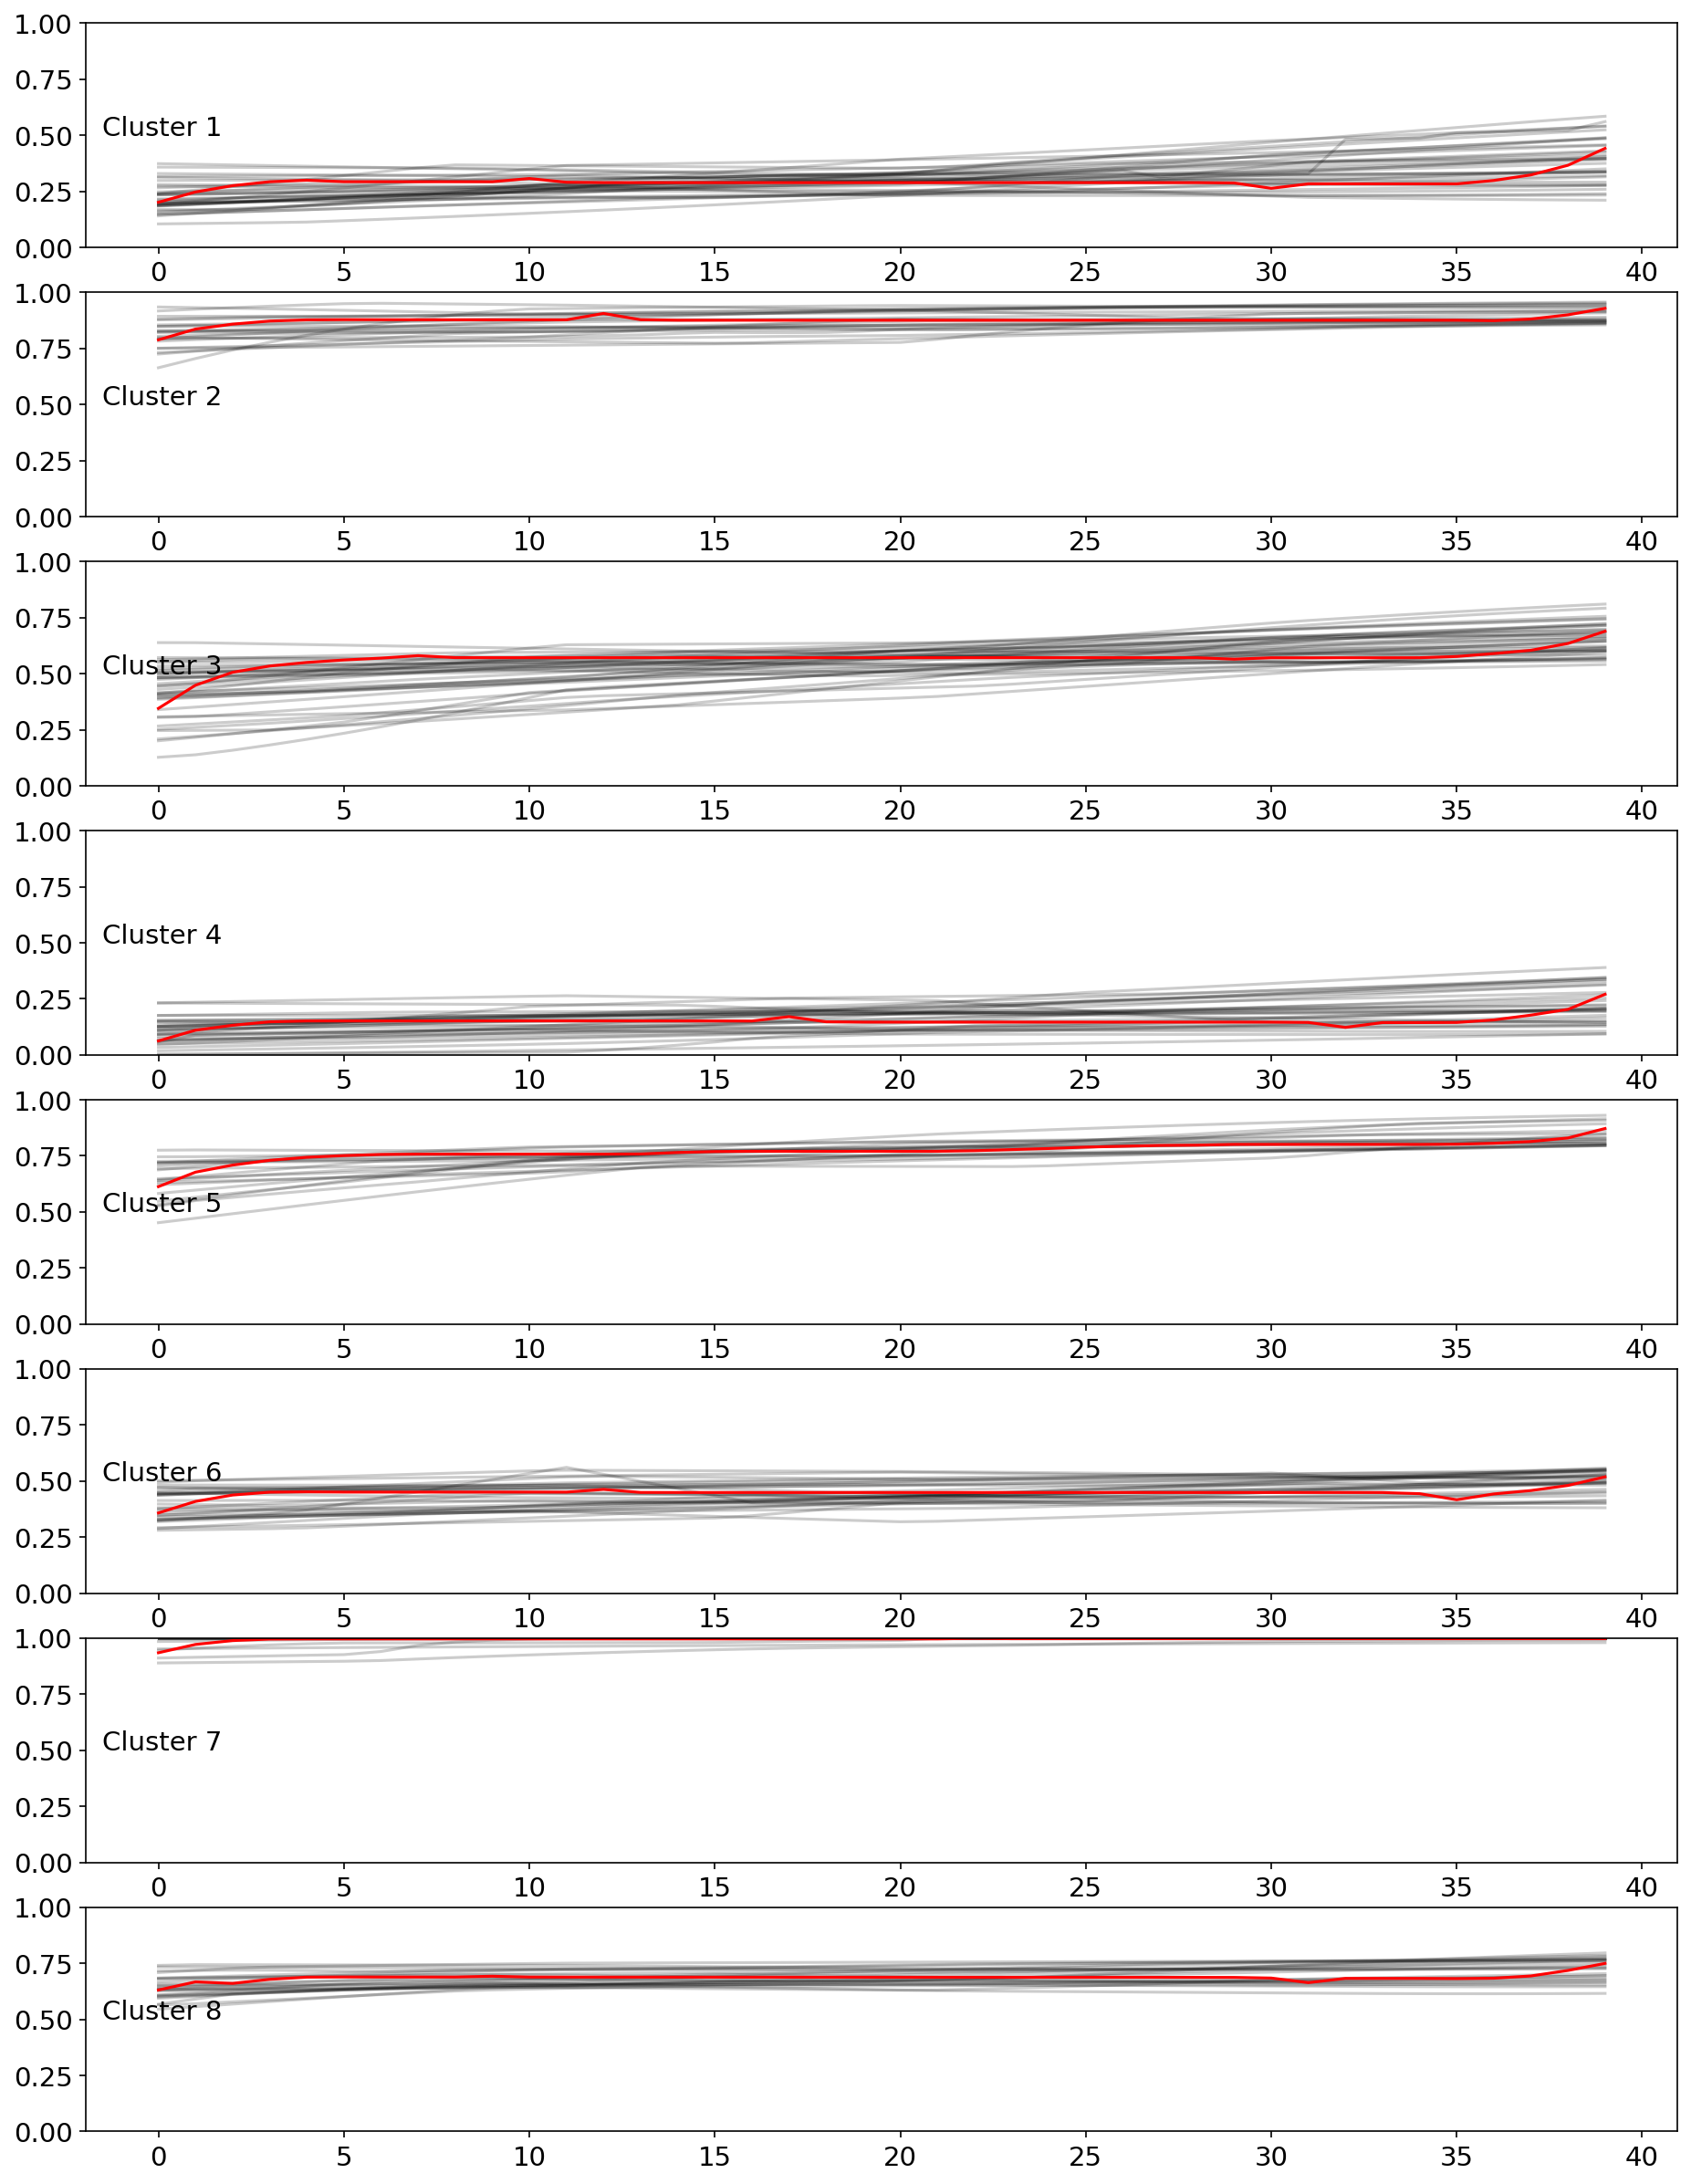

In [29]:
# Population Growth

mpl.rcParams["figure.figsize"] = (15,20) #change figure size, (x, y)
y_pred_X_urban_population = dbaKMeans(8, seed, X_train_urban_population)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.035 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.022 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.021 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 
Init 2


[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.042 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.022 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.022 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.021 --> 


[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


DBA k-means Chart


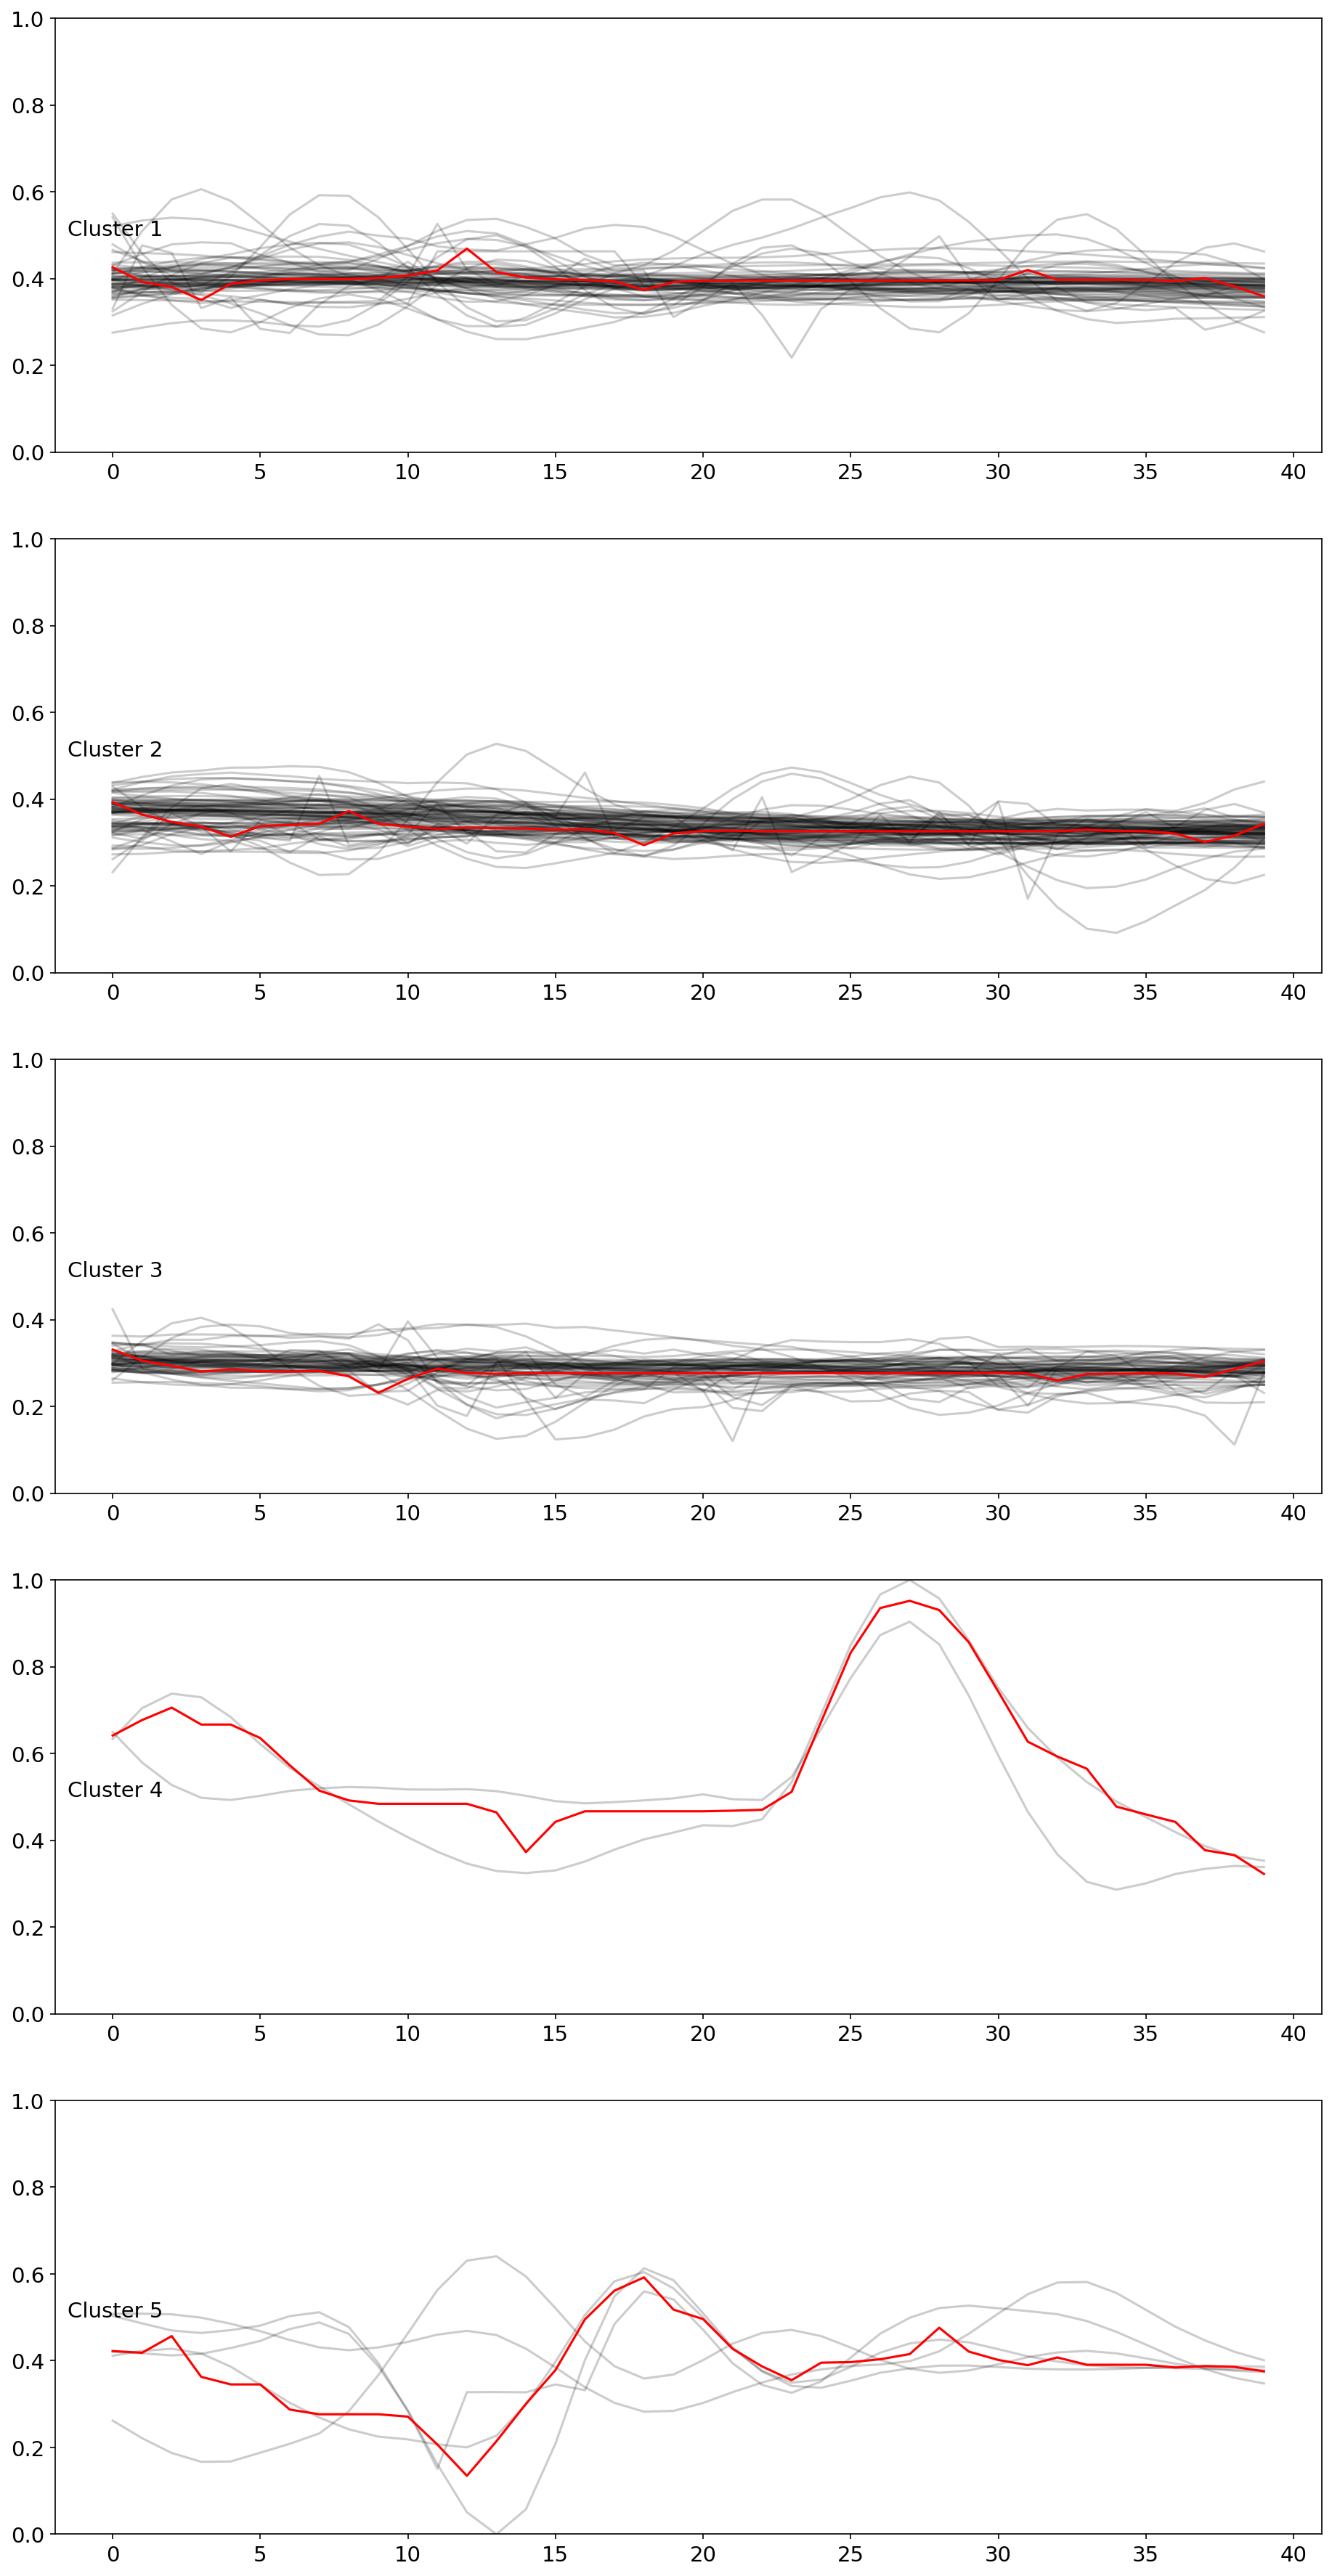

In [30]:
# Population Growth

mpl.rcParams["figure.figsize"] = (15,30) #change figure size, (x, y)
y_pred_X_population_growth = dbaKMeans(5, seed, X_train_population_growth)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 
Init 2


[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 


[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished


DBA k-means Chart


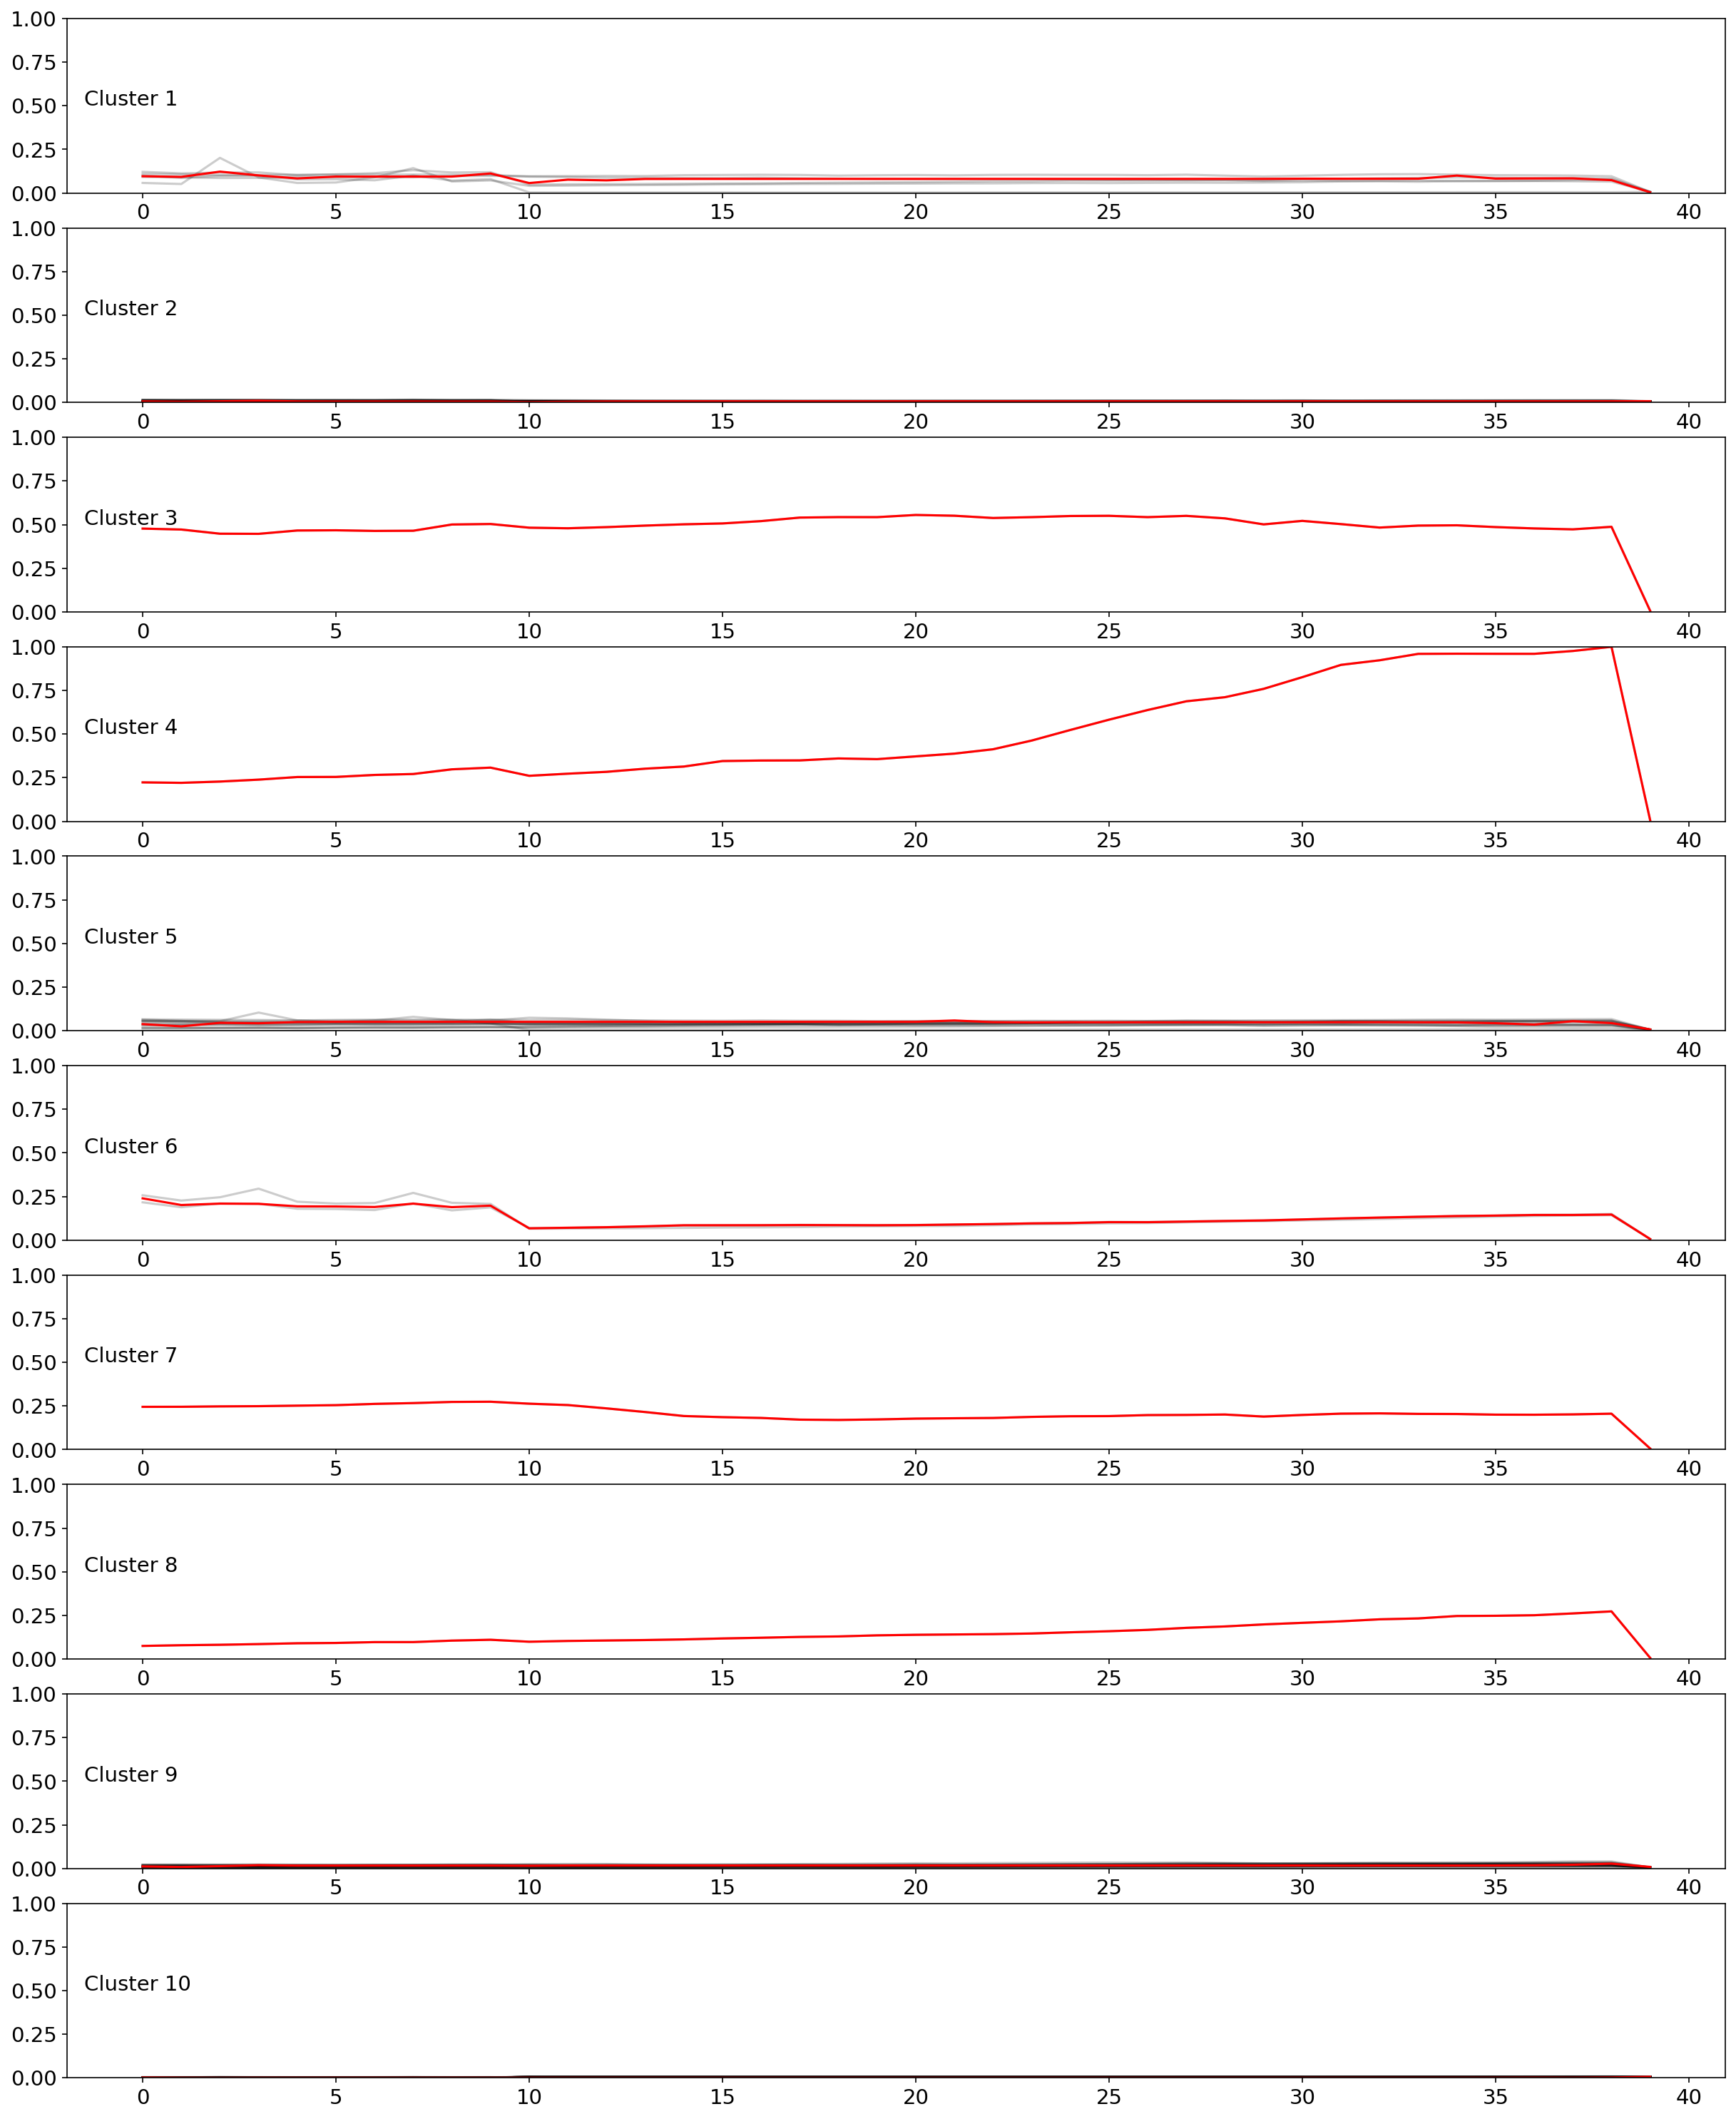

In [31]:
# co2 emissions

mpl.rcParams["figure.figsize"] = (20,25) #change figure size, (x, y)
y_pred_X_total_ghg = dbaKMeans(10, seed, X_train_total_ghg)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 
Init 2


[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 832 out of 832 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 


[Parallel(n_jobs=1)]: Done 2080 out of 2080 | elapsed:    0.3s finished


DBA k-means Chart


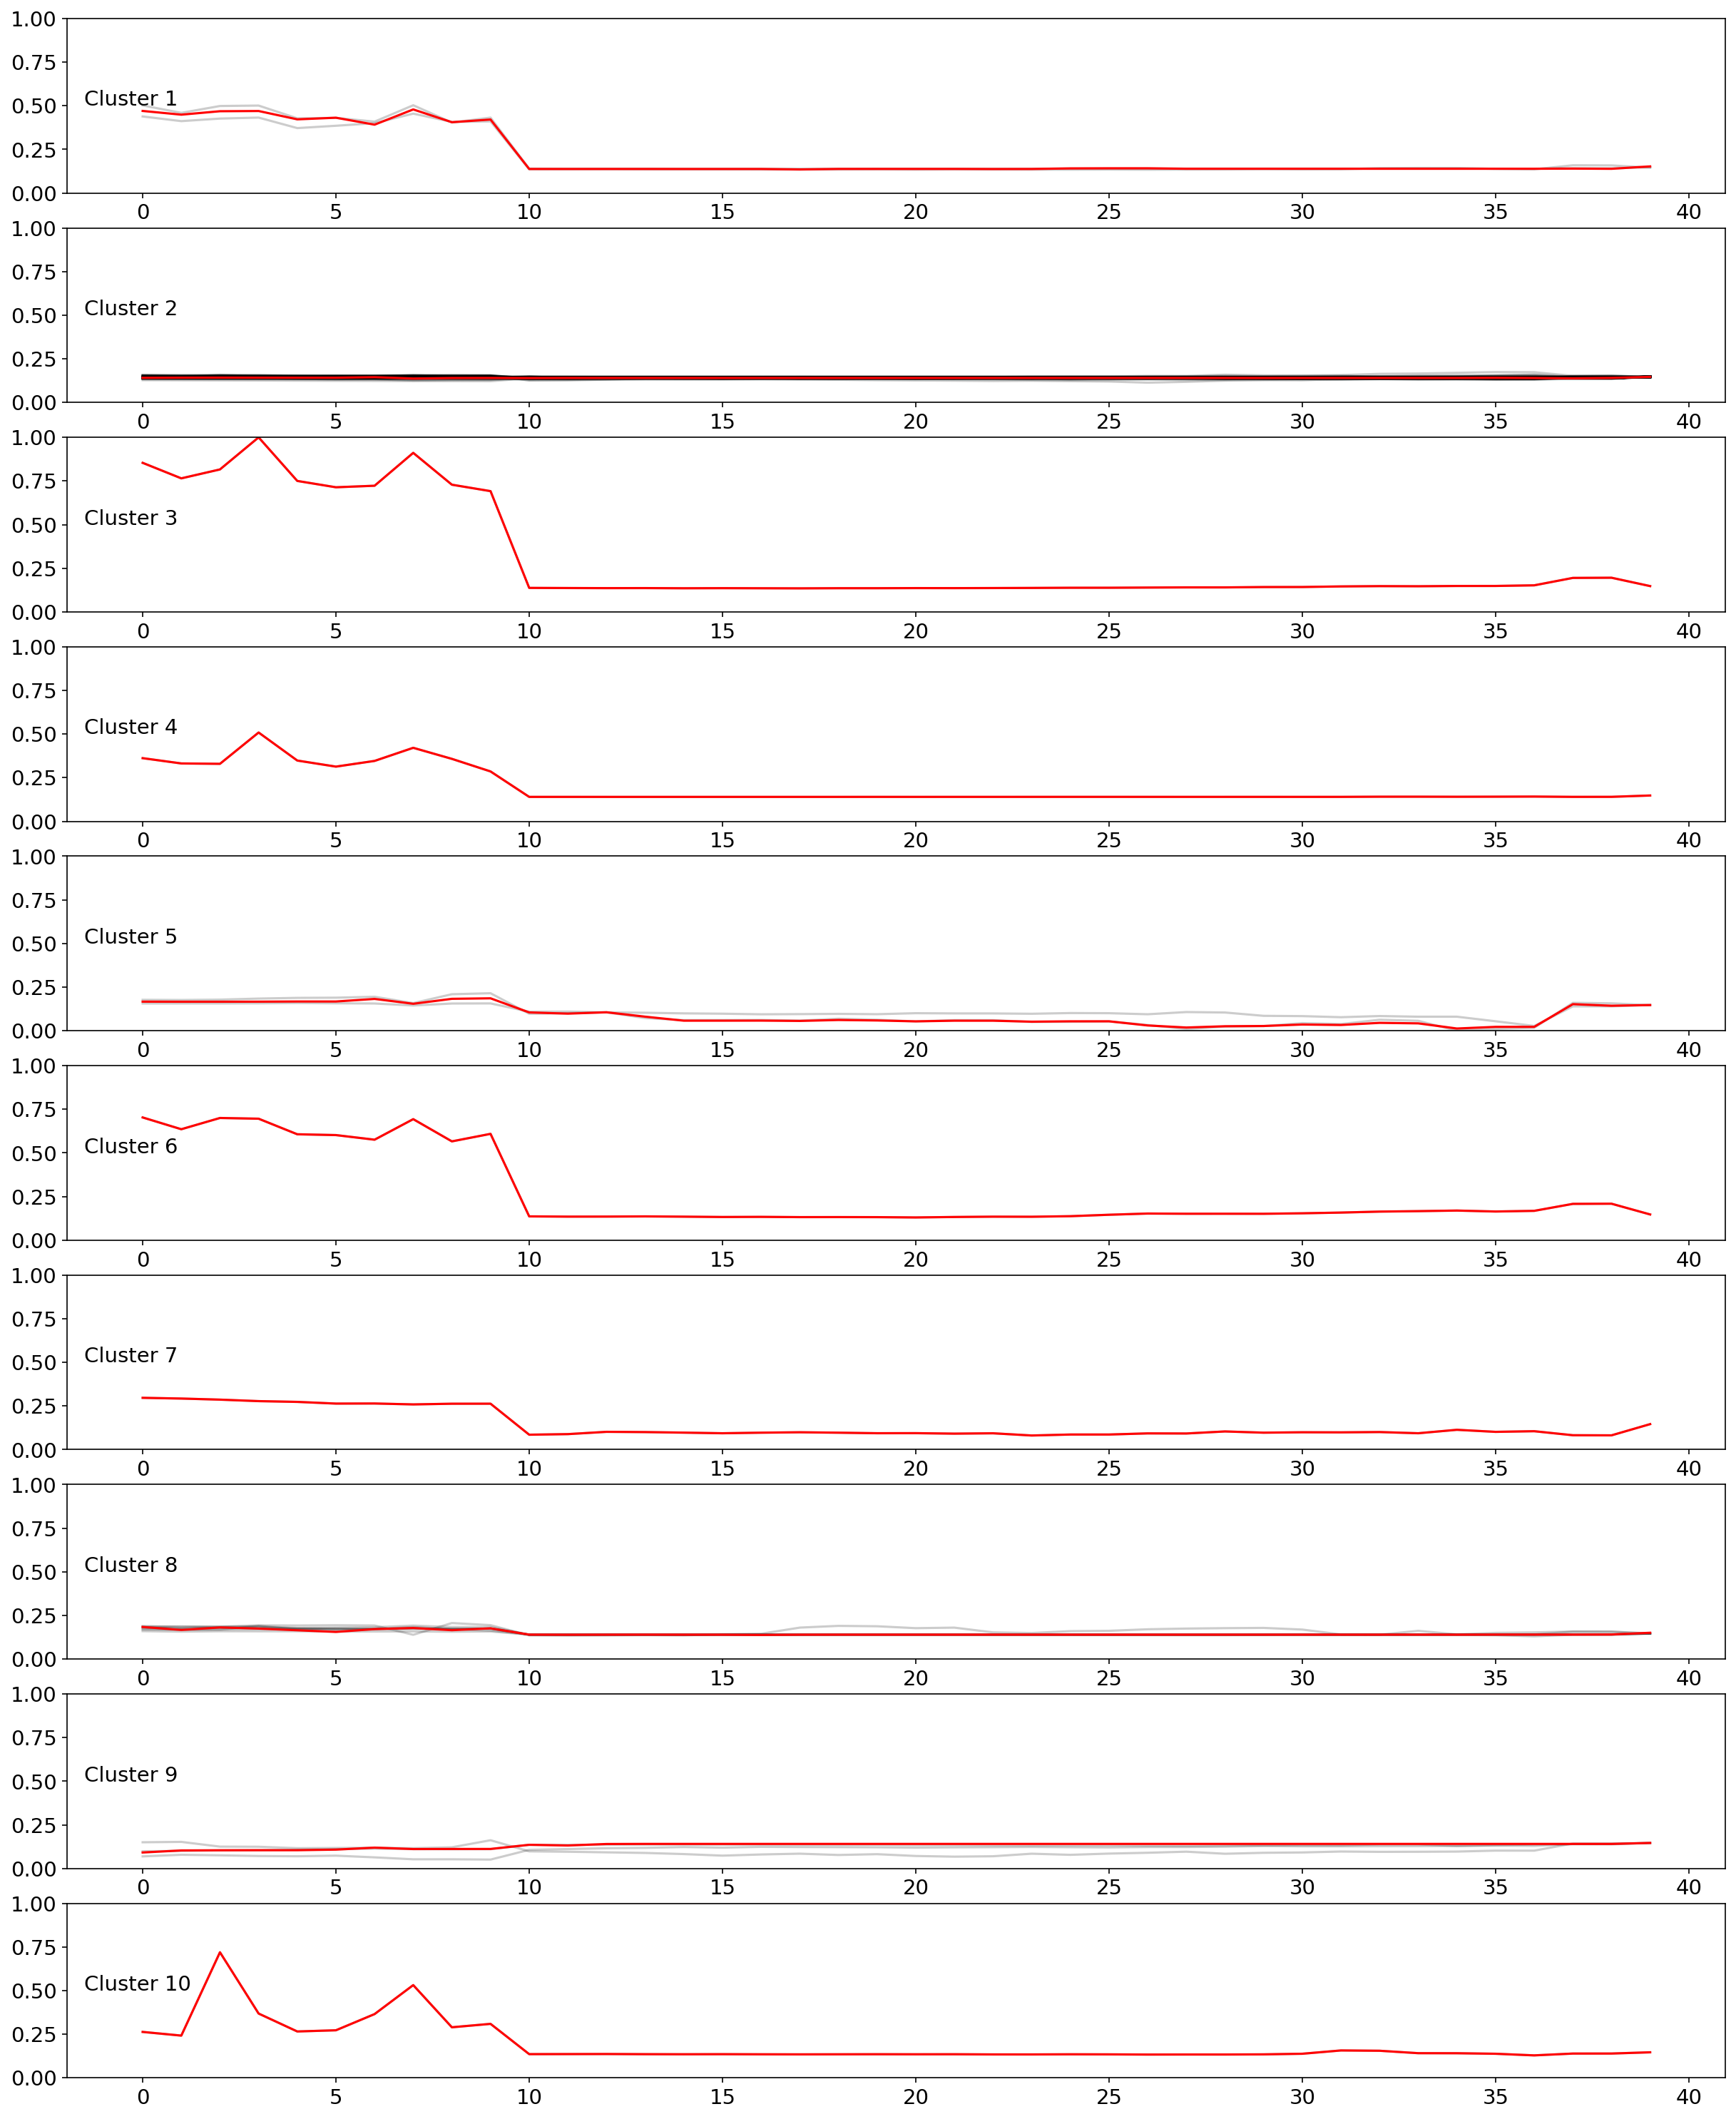

In [32]:
# co2 emissions

mpl.rcParams["figure.figsize"] = (20,25) #change figure size, (x, y)
y_pred_X_other_ghg = dbaKMeans(10, seed, X_train_other_ghg)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.013 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.004 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.004 --> 0.004 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.004 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.004 --> 0.004 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.010 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.004 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.003 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.003 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.003 --> 


[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


DBA k-means Chart


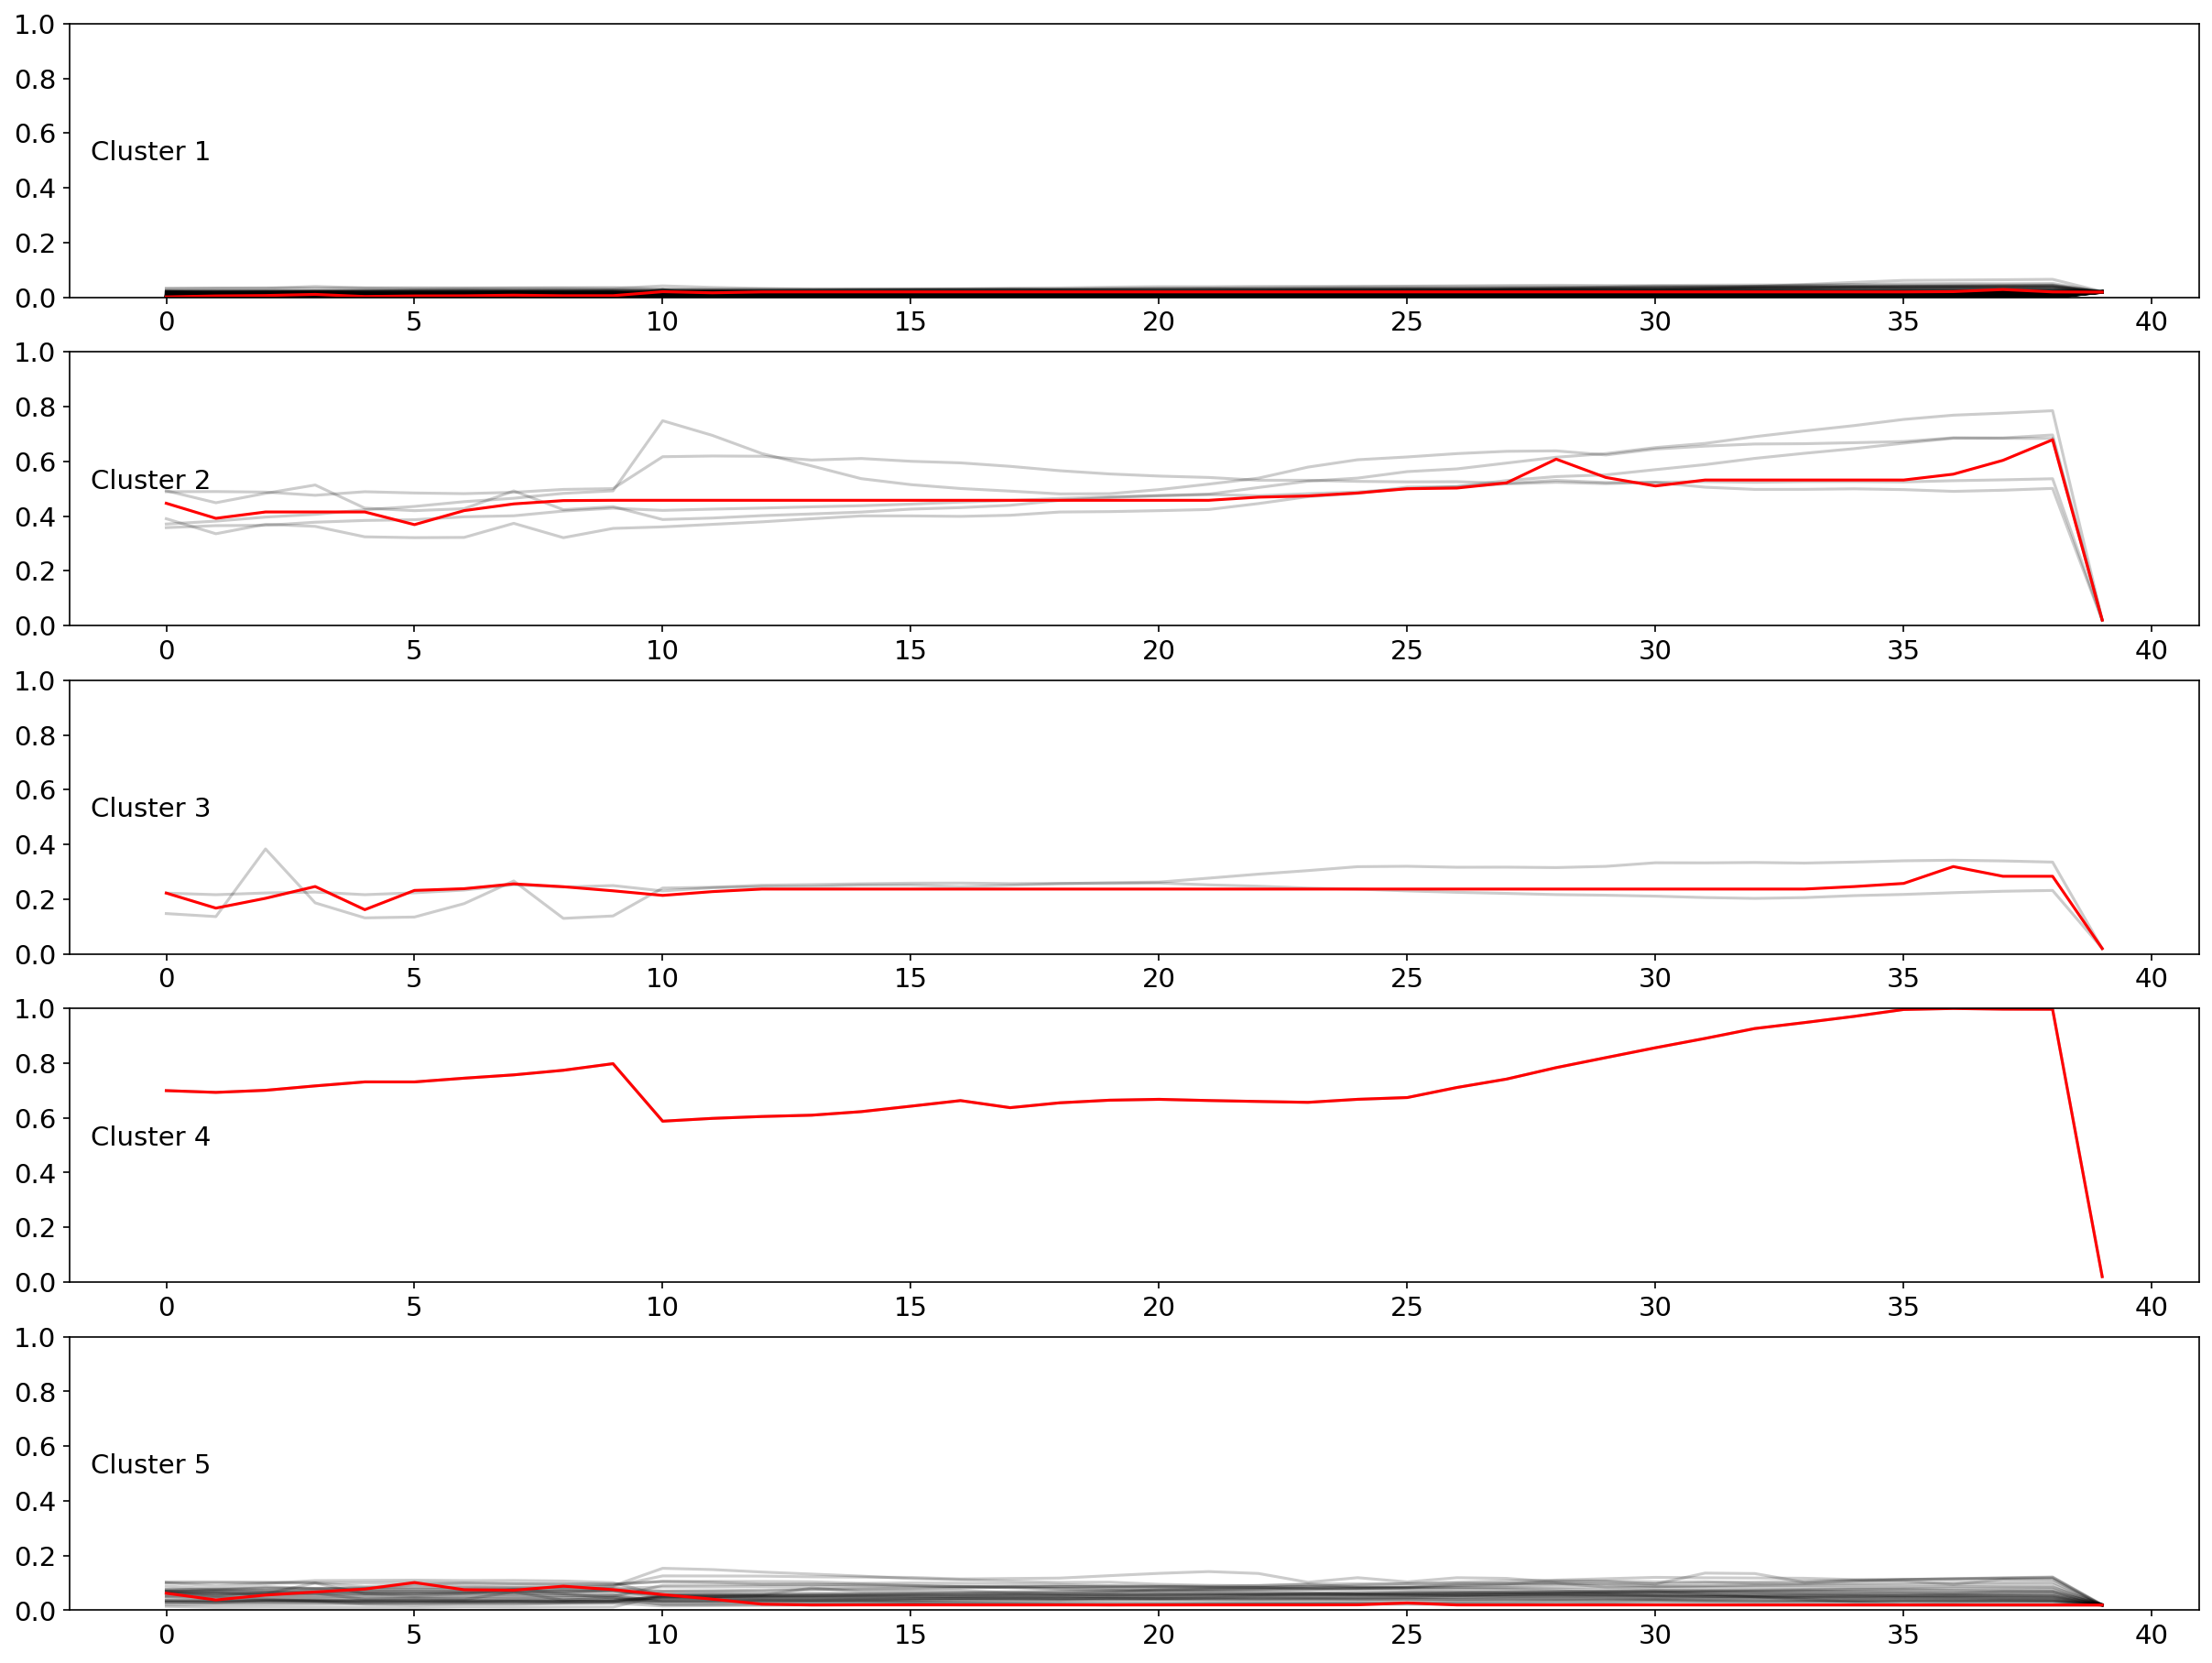

In [33]:
# Methane Emissions

mpl.rcParams["figure.figsize"] = (20,15) #change figure size, (x, y)
y_pred_X_methane_emissions = dbaKMeans(5, seed, X_train_methane_emissions)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 0.001 --> 
Init 2


[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]

0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.000 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.000 --> 


[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.2s finished


DBA k-means Chart


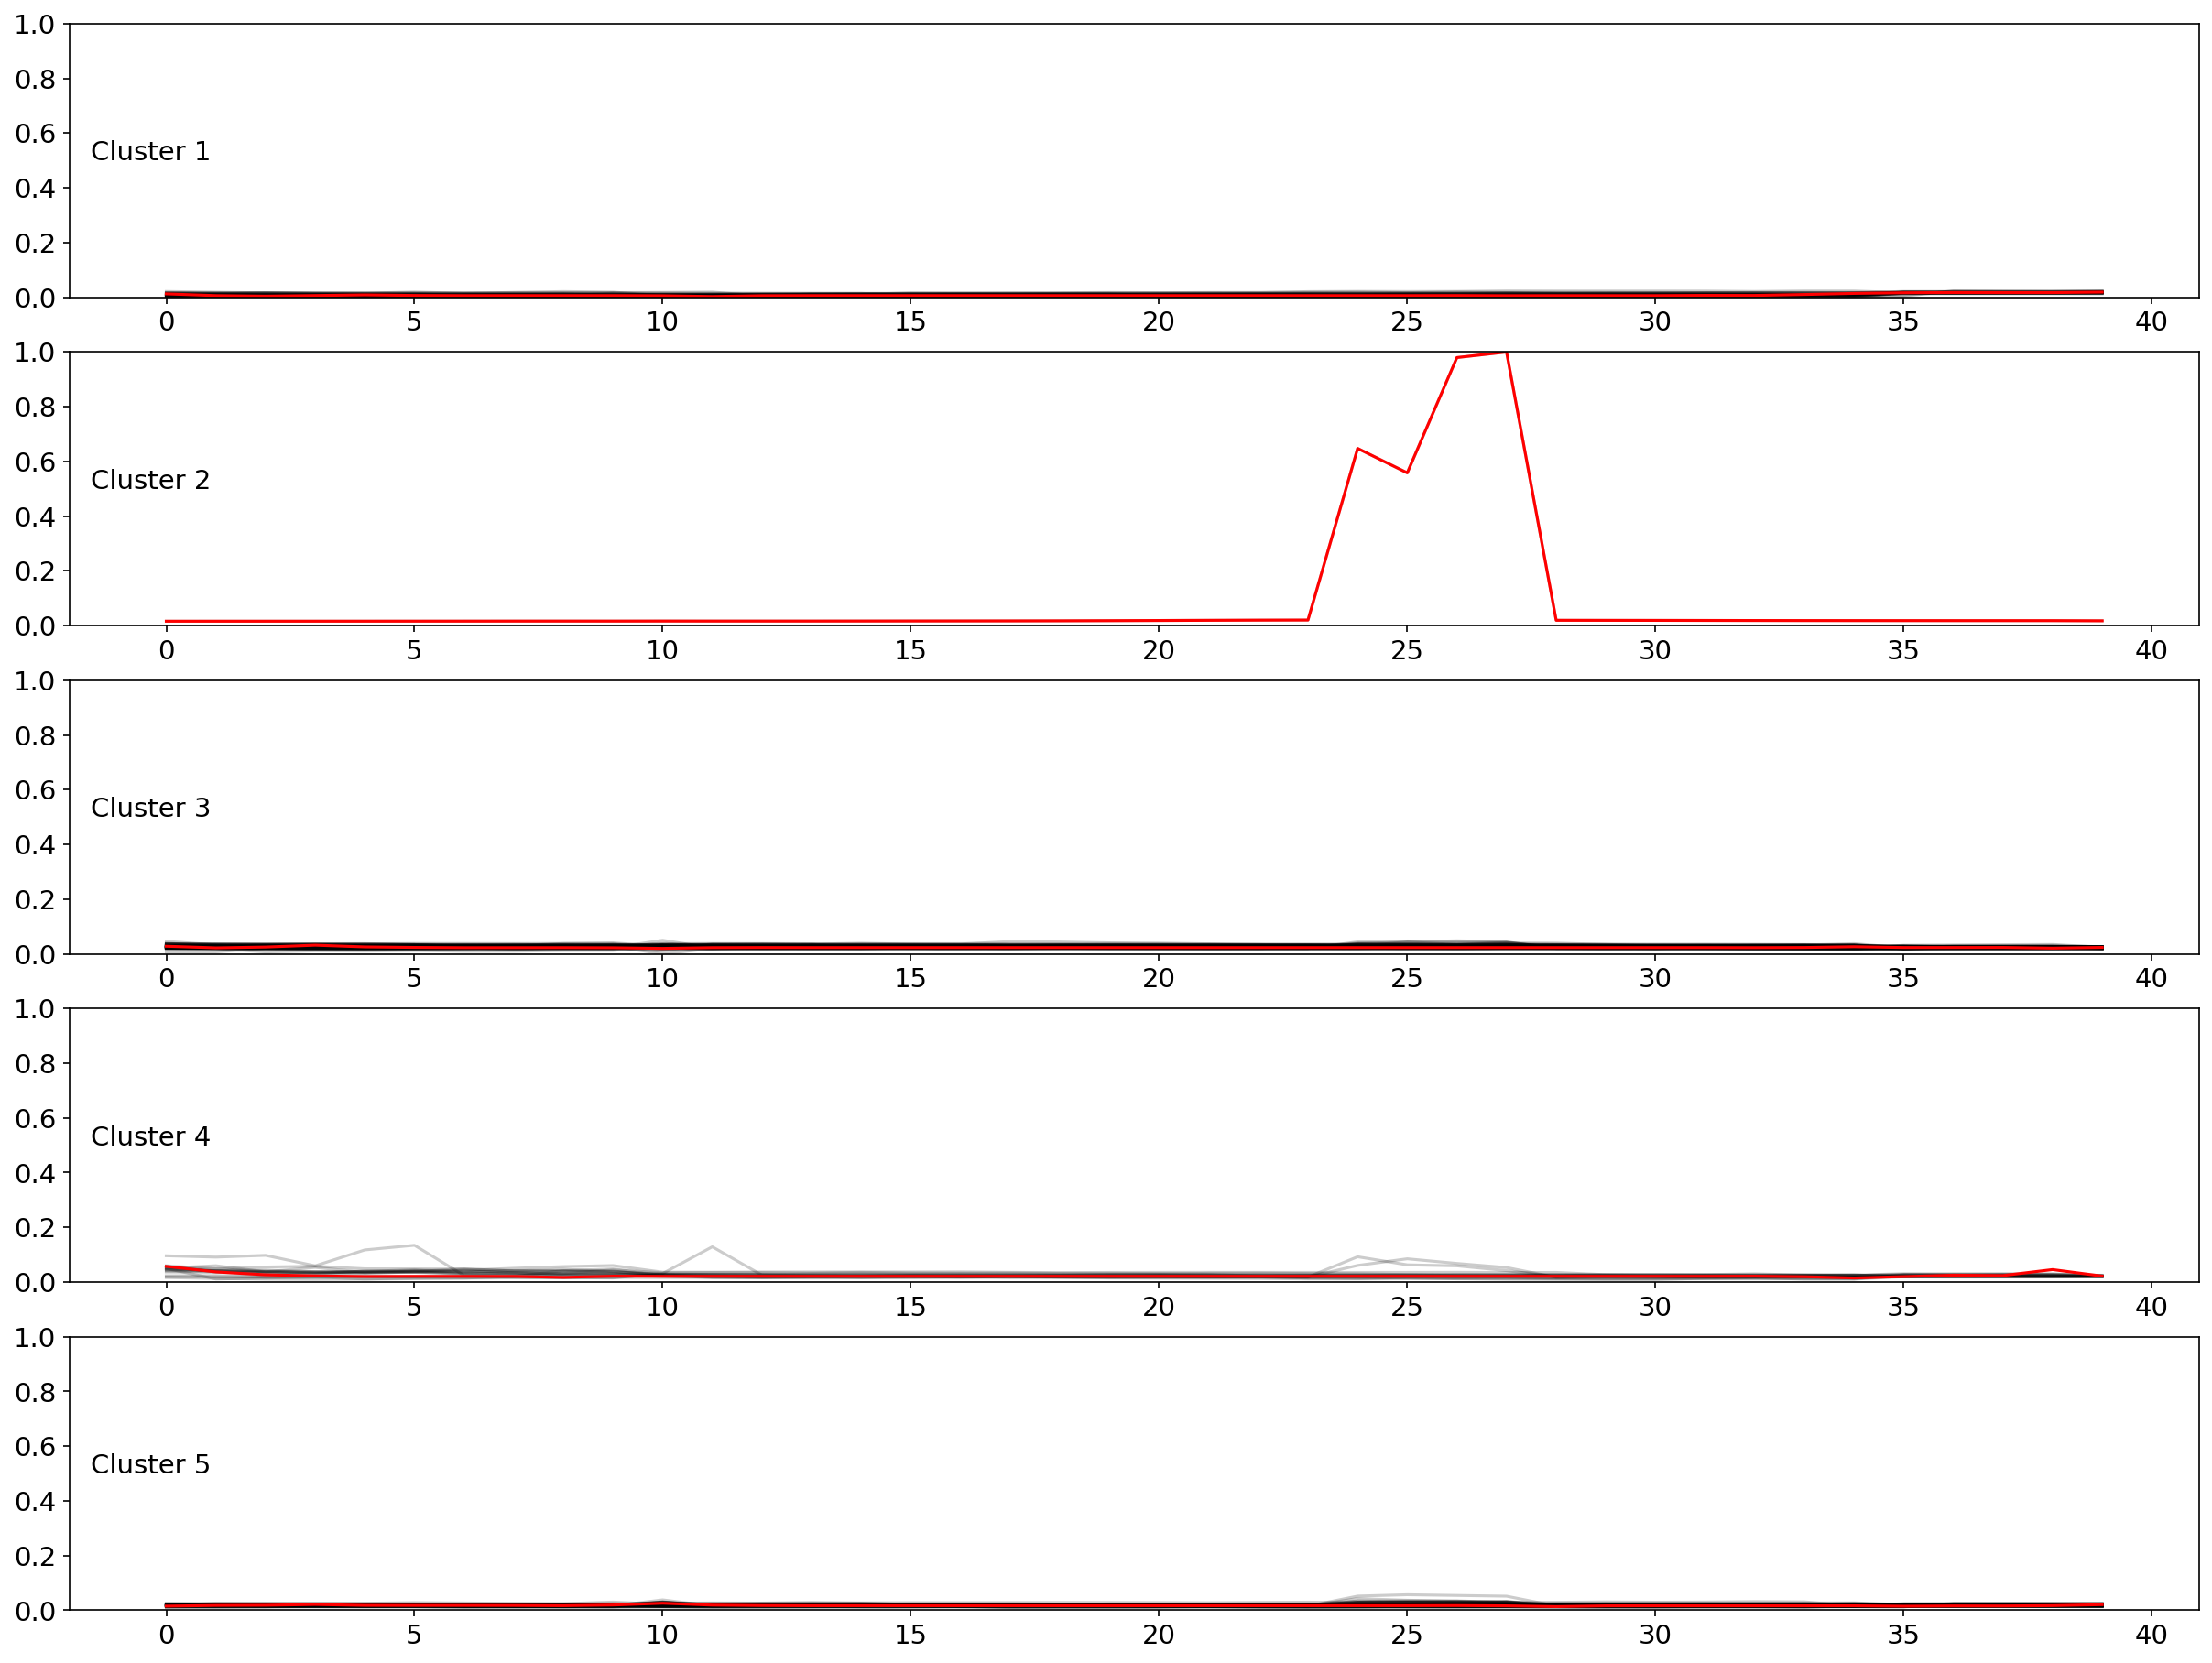

In [34]:
# co2 intensity

mpl.rcParams["figure.figsize"] = (20,15) #change figure size, (x, y)
y_pred_X_co2_intensity = dbaKMeans(5, seed, X_train_co2_intensity)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.004 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.001 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 624 out of 624 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished


0.002 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


0.001 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 

[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.001 --> 


[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed:    0.1s finished


DBA k-means Chart


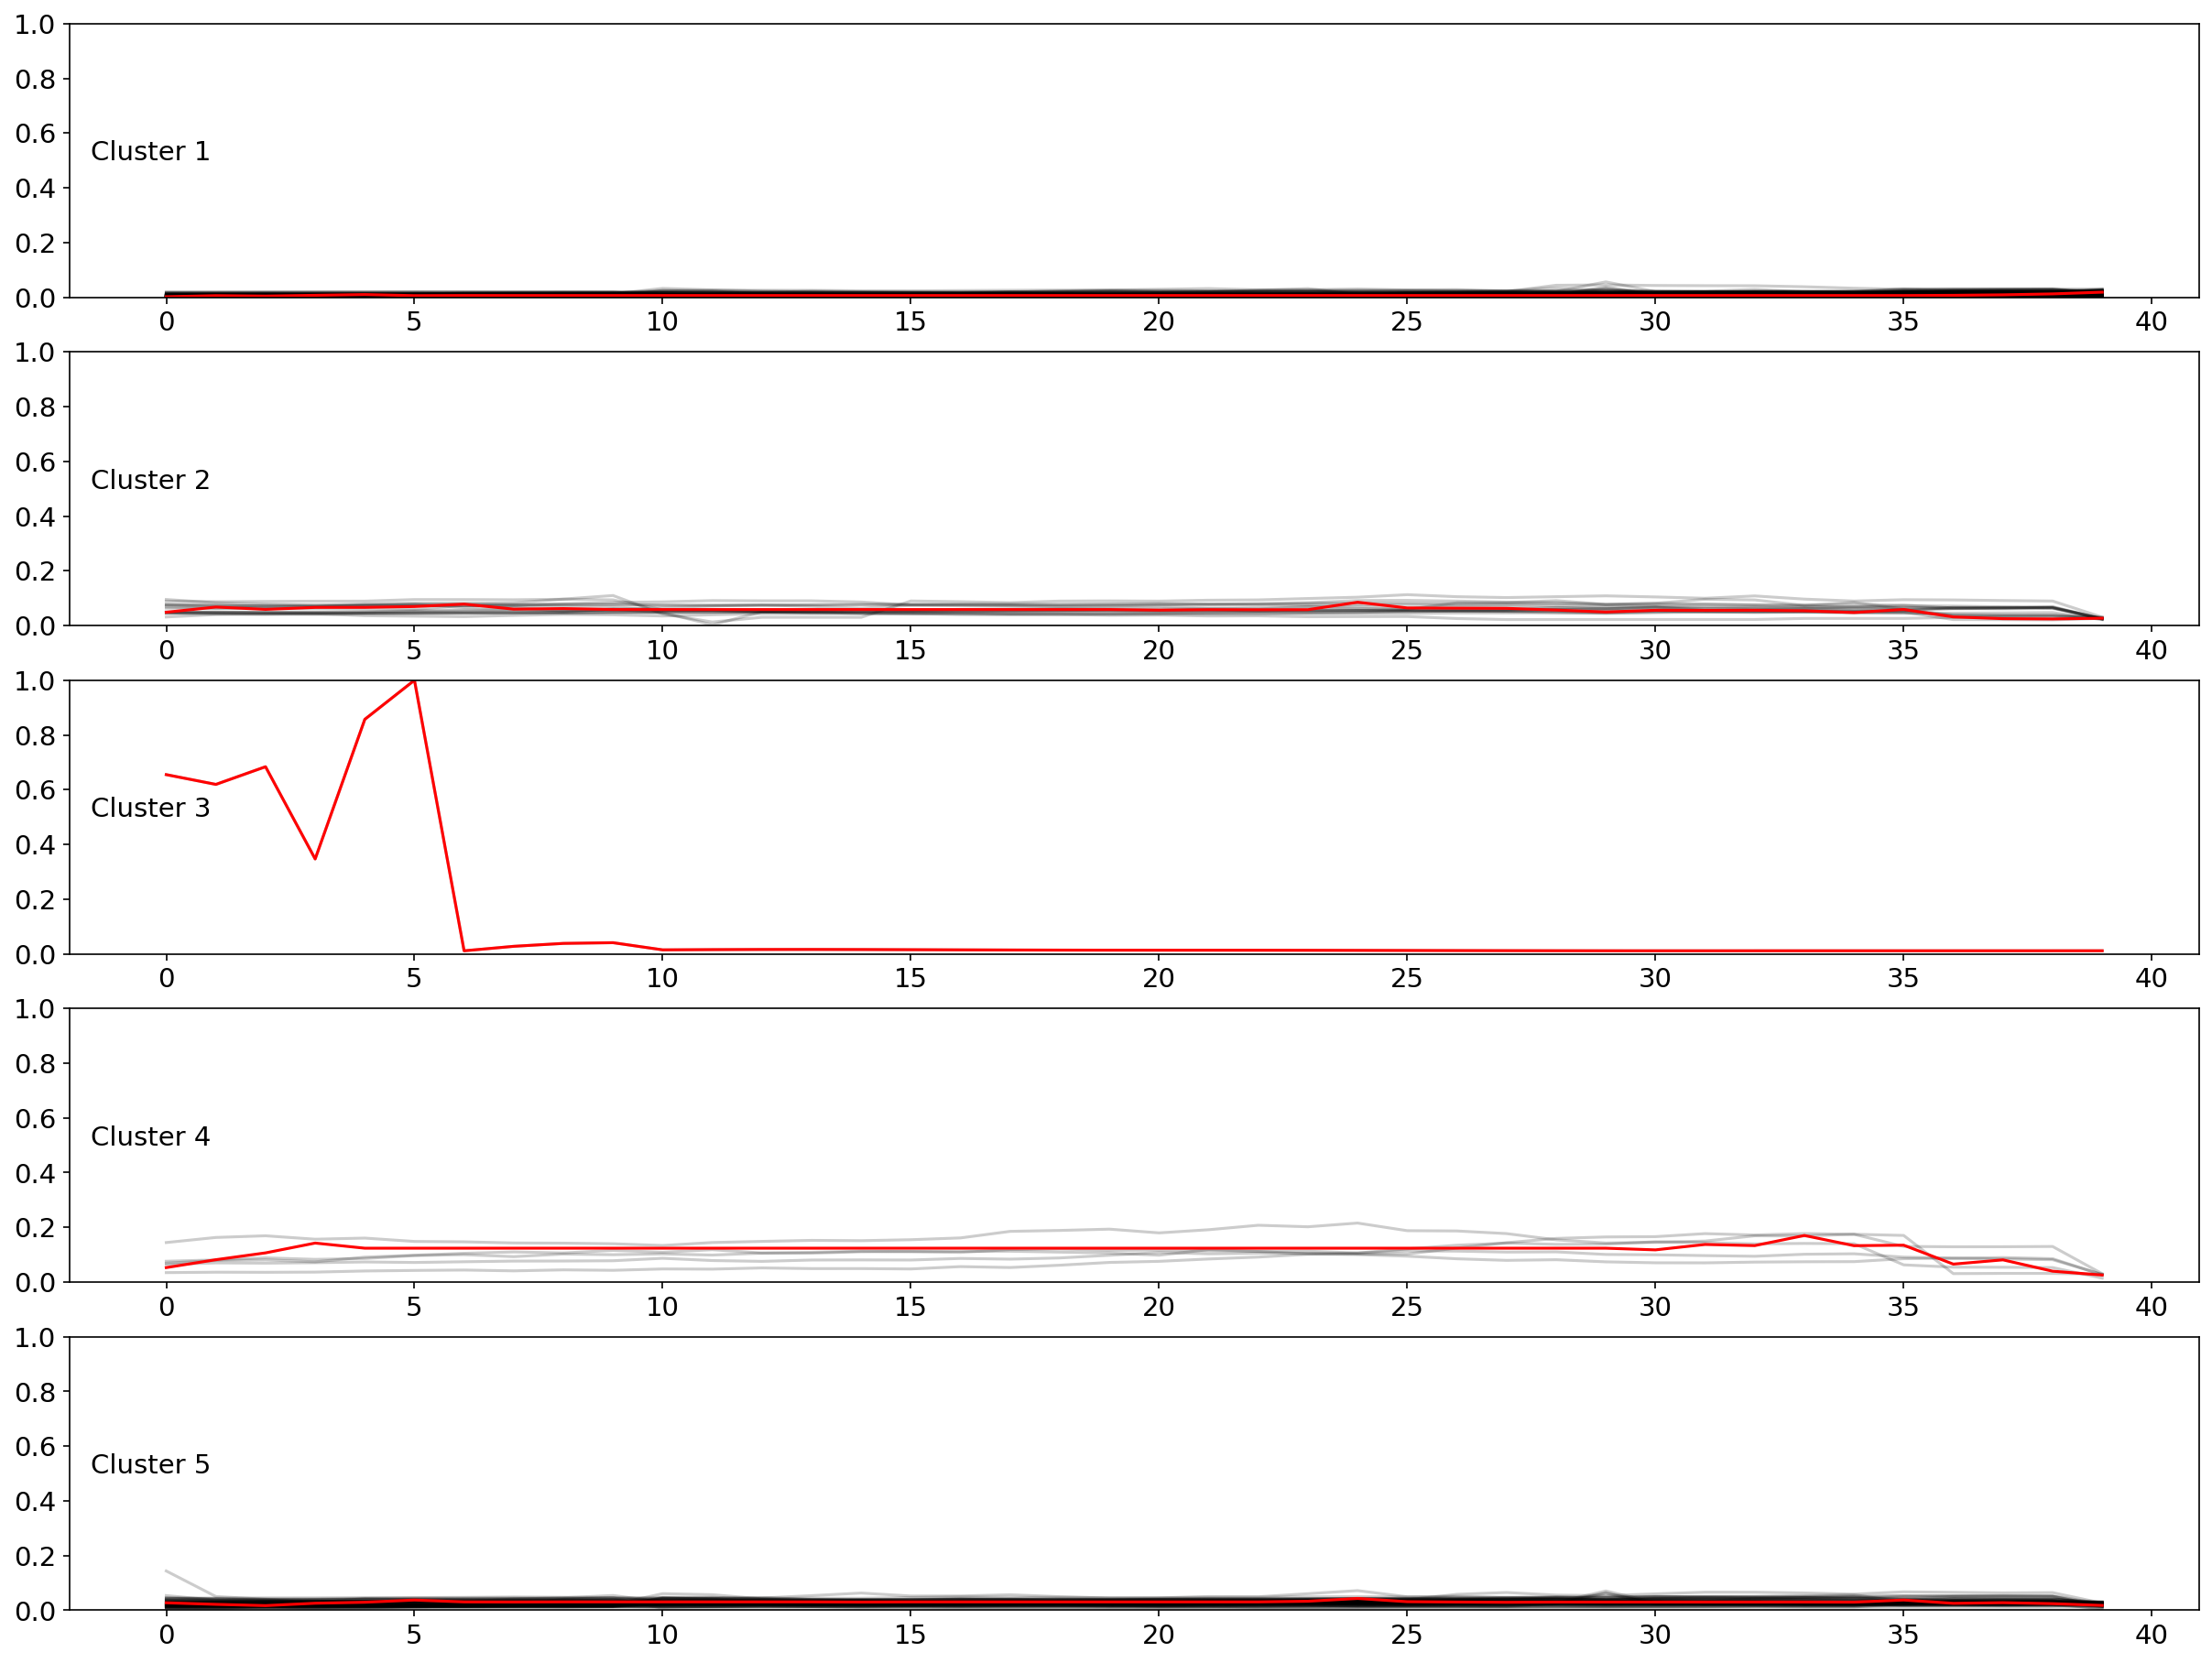

In [35]:
# Energy Use

mpl.rcParams["figure.figsize"] = (20,15) #change figure size, (x, y)
y_pred_X_energy_use = dbaKMeans(5, seed, X_train_energy_use)

## EDA for Clustering Results

In [59]:
# get y_pred result to merge with country name
# finally, will get dataframe of clustering result with country name

country_list = df_worldbank_imputed['Country Name'].unique().tolist()

cluster_result_co2_emissions_per_capita = mergeClusterNames(y_pred_X_co2_emissions_per_capita, country_list, feat_list[0])
cluster_result_co2_emissions = mergeClusterNames(y_pred_X_co2_emissions, country_list, feat_list[1])
cluster_result_urban_population = mergeClusterNames(y_pred_X_urban_population, country_list, feat_list[2])
cluster_result_population_growth = mergeClusterNames(y_pred_X_population_growth, country_list, feat_list[3])
cluster_result_total_ghg = mergeClusterNames(y_pred_X_total_ghg, country_list, feat_list[4])
cluster_result_other_ghg = mergeClusterNames(y_pred_X_other_ghg, country_list, feat_list[5])
cluster_result_methane_emissions = mergeClusterNames(y_pred_X_methane_emissions, country_list, feat_list[6])
cluster_result_co2_intensity = mergeClusterNames(y_pred_X_co2_intensity, country_list, feat_list[7])
cluster_result_energy_use = mergeClusterNames(y_pred_X_energy_use, country_list, feat_list[8])

### Visualization

In [37]:
def get_df_viz(df_raw_data, df_cluster, clusterNumber):
    
    # prepare to filter data
    indicator_name = df_cluster.columns.tolist()[0]
    clusterNumber = clusterNumber - 1 # adjust number based on "graph" 
    cluster_country_name = df_cluster[df_cluster['cluster']==(clusterNumber)][indicator_name]
    cluster_country_name = cluster_country_name.unique().tolist()
    columnToKeep = ['Country Name', 'Year'] + [indicator_name]
    df_viz = df_raw_data.copy()
    
    print("INDICATOR NAME: " + indicator_name)
    print("ACTUAL CLUSTER: " + str(clusterNumber))
    print("COUNTRY LIST: ")
    print(str(cluster_country_name))
    
    # selection
    df_viz = df_viz[columnToKeep]
    df_viz = df_viz[df_viz['Country Name'].isin(cluster_country_name)]
    df_viz.reset_index(inplace=True)
    return df_viz

In [38]:
#
# ****************
# *** Archived ***
# ****************
#

# Clusters that require more attention

# co2 emissions per capital - cluster 3, 5, 6, 8
# co2 emissions - cluster 2, 3, 5, 6, 7, 8, 10
# urban population - cluster 
# population growth - cluster 
# total ghg - cluster
# other ghg - cluster
# co2 intensity - cluster 
# methane_emissions - cluster 
# energy use - cluster 

In [60]:
fig = px.line(get_df_viz(df_worldbank_imputed, cluster_result_co2_emissions_per_capita, 3), 
              x="Year", 
              y=feat_list[0], 
              color='Country Name')
fig.show()

INDICATOR NAME: CO2 emissions (metric tons per capita)
ACTUAL CLUSTER: 2
COUNTRY LIST: 
['Aruba']


In [61]:
fig = px.line(get_df_viz(df_worldbank_imputed, cluster_result_co2_emissions_per_capita, 5), 
              x="Year", 
              y=feat_list[0], 
              color='Country Name')
fig.show()

INDICATOR NAME: CO2 emissions (metric tons per capita)
ACTUAL CLUSTER: 4
COUNTRY LIST: 
['Australia', 'Brunei Darussalam', 'Canada', 'Czech Republic', 'Estonia', 'Oman', 'Palau', 'Saudi Arabia', 'Trinidad and Tobago']


In [62]:
fig = px.line(get_df_viz(df_worldbank_imputed, cluster_result_co2_emissions_per_capita, 6), 
              x="Year", 
              y=feat_list[0], 
              color='Country Name')
fig.show()

INDICATOR NAME: CO2 emissions (metric tons per capita)
ACTUAL CLUSTER: 5
COUNTRY LIST: 
['Qatar']
